In [1]:
from os.path import join as pjoin
from os import listdir as lsdir
from obspy.geodetics import kilometer2degrees
from obspy.taup import TauPyModel
from scipy.optimize import approx_fprime as af
import numpy as np
import subprocess
import Create_Vmod
from SS_MTI import Gradient, PhaseTracer

# Save directory

In [2]:
save_path = "/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/"

# Fixed parameters

In [3]:
bin_path = "/home/nienke/Documents/Research/SS_MTI/External_packages/reflectivity_Mars/SRC/test/crfl_sac"
if not lsdir(save_path):
    subprocess.call(f"scp {bin_path} .", shell=True, cwd=save_path)

In [4]:
src_depth = 20.0
epi_in_km = 1774.7380
epi = kilometer2degrees(epi_in_km, radius=3389.5)
baz = 0.0

dt = 0.025

phases = ["P", "S", "P", "S", "S"]
comps = ["Z", "T", "R", "Z", "R"]
t_pres = [1, 1, 1, 1, 1]
t_posts = [30, 30, 30, 30, 30]
ylims = [1e-9, 1e-9, 2e-9, 3e-9, 2e-9]

fmin = 0.2
fmax = 0.6
zerophase = False

# Observed data

In [5]:
path_observed = (
    "/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/obs/"
)
npz_file = "/home/nienke/Documents/Research/Data/npz_files/TAYAK.npz"
st_obs = Gradient.read_refl_mseeds(path=path_observed)
Taup = TauPyModel(npz_file)
obs_tts = [PhaseTracer.get_traveltime(Taup, phase, src_depth, epi) for phase in phases]
st_obs_w, st_obs_full, s_obs = Gradient.window(
    st_obs, phases, comps, obs_tts, t_pres, t_posts, fmin, fmax, zerophase,
)

# Start values

In [6]:
bm_start_model = "/home/nienke/Documents/Research/Data/MTI/MT_vs_STR/bm_models/TAYAK.bm"
m_rr = 0.2
m_tt = 0.8
m_pp = 0.0
m_rt = 0.0
m_rp = 0.0
m_tp = 0.0
focal_mech = [m_rr, m_tt, m_pp, m_rt, m_rp, m_tp]
Moho_d = 77.3680

Create_Vmod.create_dat_file(
    src_depth, epi_in_km, baz, focal_mech, dt, save_path, bm_start_model,
)

/home/nienke/Documents/Research/SS_MTI/Scripts_MT_Structure/Create_Vmod.py:292: RuntimeWarning: divide by zero encountered in double_scalars
  qp = 1 / (L * (1 / qmu) + (1 - L) * (1 / qka))
/home/nienke/Documents/Research/SS_MTI/Scripts_MT_Structure/Create_Vmod.py:292: RuntimeWarning: invalid value encountered in double_scalars
  qp = 1 / (L * (1 / qmu) + (1 - L) * (1 / qka))


In [7]:
m0 = np.hstack((focal_mech, Moho_d))
sigmas = np.ones(len(phases)) * 1e-10

# Line search

In [8]:
src_str = Gradient.SRC_STR(
    binary_file_path=bin_path,
    path_to_dat=save_path,
    phases=phases,
    components=comps,
    t_pres=t_pres,
    t_posts=t_posts,
    depth=True,
    vpvs=False,
    fmin=fmin,
    fmax=fmax,
    dt=dt,
    baz=baz,
    sigmas=sigmas,
    zerophase=zerophase,
    plot=True,
    st_obs_full=st_obs_full,
    tt_obs=obs_tts,
    ylims=ylims,
)

Update nr 57 with m: [  0.2     0.8     0.      0.      0.      0.     77.368]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/57.tvel' ...
1041.16951729
Update nr 58 with m: [  0.2     0.8     0.      0.      0.      0.     77.368]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/58.tvel' ...
1041.16951729
Update nr 59 with m: [  0.2     0.8     0.      0.      0.      0.     77.368]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/59.tvel' ...
1041.16951729
Update nr 60 with m: [  2.00000000e-01   8.00000000e-01   1.66666667e-11   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.73680000e+01]
depth of MOHO (from TAYAK) will 

/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.16951729
Update nr 78 with m: [  2.00000000e-01   8.00000000e-01   0.00000000e+00   0.00000000e+00
   1.66666667e-05   0.00000000e+00   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/78.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.16951729
Update nr 79 with m: [  2.00000000e-01   8.00000000e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.66666667e-05   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/79.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.16951729
Update nr 80 with m: [  0.2         0.8         0.          0.          0.          0.
  77.3757368]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/80.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1040.40648505
Update nr 81 with m: [  0.2     0.8     0.      0.      0.      0.     77.368]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/81.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.16951729
Update nr 82 with m: [  0.20016667   0.8          0.           0.           0.
   0.          77.368     ]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/82.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1040.69744574
Update nr 83 with m: [  0.2          0.80016667   0.           0.           0.
   0.          77.368     ]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/83.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.21550729
Update nr 84 with m: [  2.00000000e-01   8.00000000e-01   1.66666667e-04   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/84.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.22707842
Update nr 85 with m: [  2.00000000e-01   8.00000000e-01   0.00000000e+00   1.66666667e-04
   0.00000000e+00   0.00000000e+00   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/85.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.16951729
Update nr 86 with m: [  2.00000000e-01   8.00000000e-01   0.00000000e+00   0.00000000e+00
   1.66666667e-04   0.00000000e+00   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/86.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.16776892
Update nr 87 with m: [  2.00000000e-01   8.00000000e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.66666667e-04   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/87.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.31676831
Update nr 88 with m: [  0.2        0.8        0.         0.         0.         0.
  77.445368]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/88.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1045.83412992
Update nr 89 with m: [  0.2     0.8     0.      0.      0.      0.     77.368]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/89.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.16951729
Update nr 90 with m: [  0.20166667   0.8          0.           0.           0.
   0.          77.368     ]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/90.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1037.16085968
Update nr 91 with m: [  0.2          0.80166667   0.           0.           0.
   0.          77.368     ]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/91.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.56079792
Update nr 92 with m: [  2.00000000e-01   8.00000000e-01   1.66666667e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/92.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.66531012
Update nr 93 with m: [  2.00000000e-01   8.00000000e-01   0.00000000e+00   1.66666667e-03
   0.00000000e+00   0.00000000e+00   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/93.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.16951729
Update nr 94 with m: [  2.00000000e-01   8.00000000e-01   0.00000000e+00   0.00000000e+00
   1.66666667e-03   0.00000000e+00   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/94.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.15464715
Update nr 95 with m: [  2.00000000e-01   8.00000000e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.66666667e-03   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/95.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1042.42410446
Update nr 96 with m: [  0.2       0.8       0.        0.        0.        0.       78.14168]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/96.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1360.46697213
Update nr 97 with m: [  0.2     0.8     0.      0.      0.      0.     77.368]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/97.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.16951729
Update nr 98 with m: [  0.21666667   0.8          0.           0.           0.
   0.          77.368     ]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/98.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1002.1592603
Update nr 99 with m: [  0.2          0.81666667   0.           0.           0.
   0.          77.368     ]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/99.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1045.04931664
Update nr 100 with m: [  2.00000000e-01   8.00000000e-01   1.66666667e-02   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/100.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1046.62619563
Update nr 101 with m: [  2.00000000e-01   8.00000000e-01   0.00000000e+00   1.66666667e-02
   0.00000000e+00   0.00000000e+00   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/101.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.16951729
Update nr 102 with m: [  2.00000000e-01   8.00000000e-01   0.00000000e+00   0.00000000e+00
   1.66666667e-02   0.00000000e+00   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/102.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1041.04844555
Update nr 103 with m: [  2.00000000e-01   8.00000000e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.66666667e-02   7.73680000e+01]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/103.tvel' ...


/home/nienke/Documents/Research/SS_MTI/SS_MTI/Gradient.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=len(phases), ncols=1, sharex="all", figsize=(18, 20))


1053.76595137
Update nr 104 with m: [  0.2      0.8      0.       0.       0.       0.      85.1048]
depth of MOHO (from TAYAK) will be changed
Building obspy.taup model for '/home/nienke/Documents/Research/SS_MTI/External_packages/Test_reflectivity/m0_gradient_descent/104.tvel' ...


SlownessModelError: High Slowness zone has zero or negative thickness!

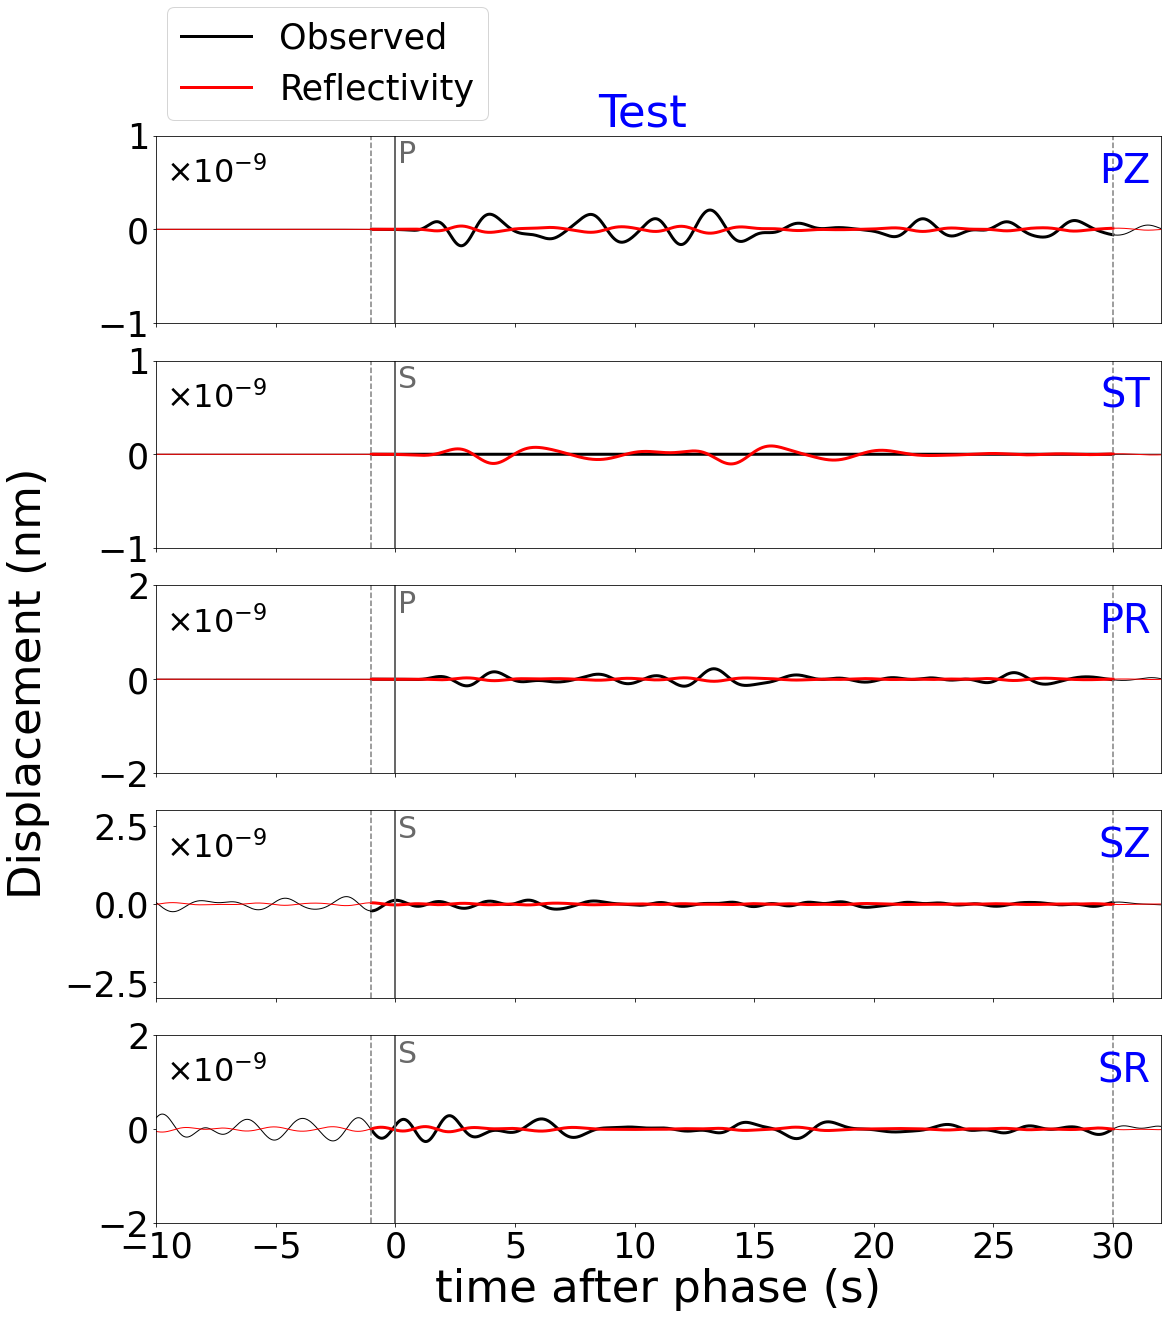

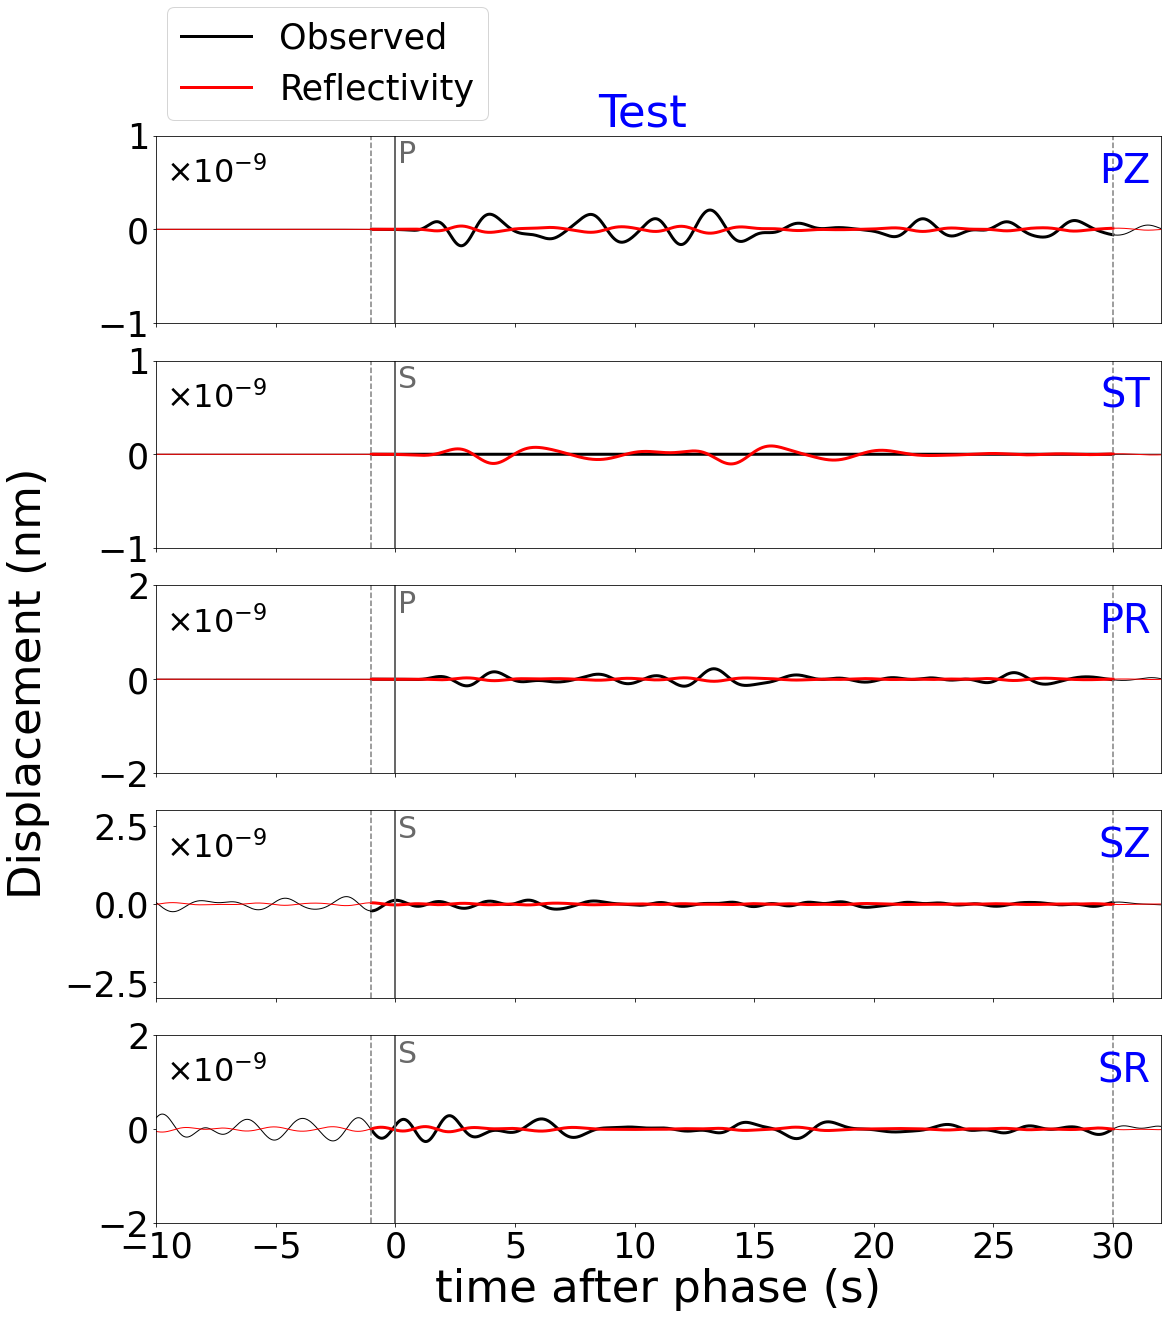

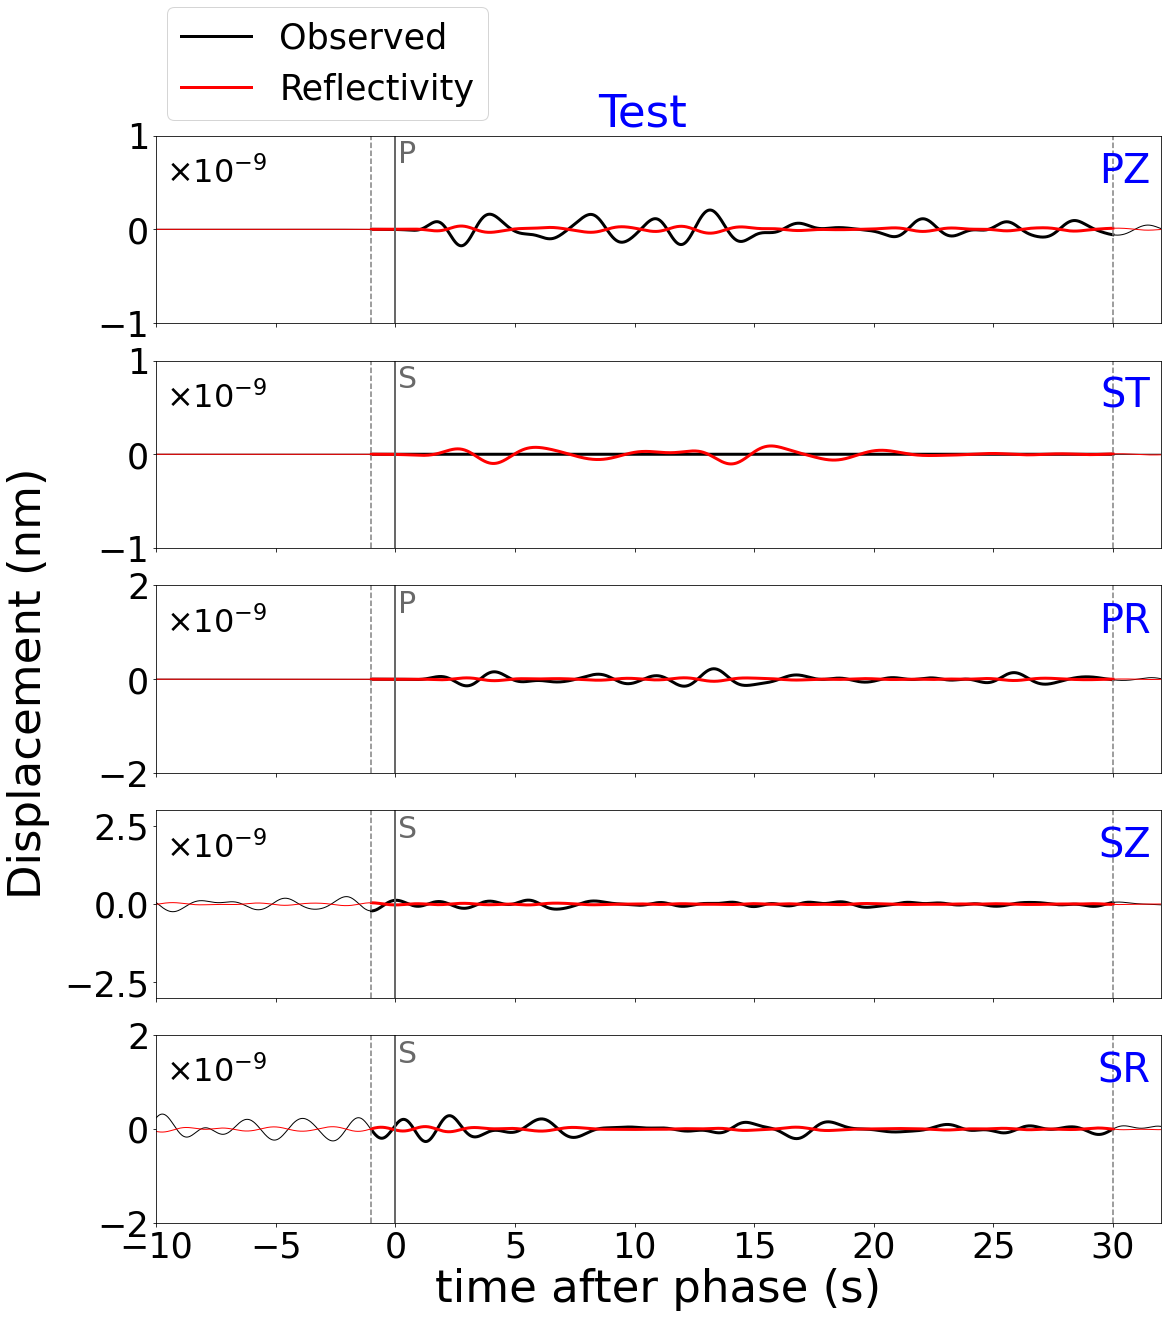

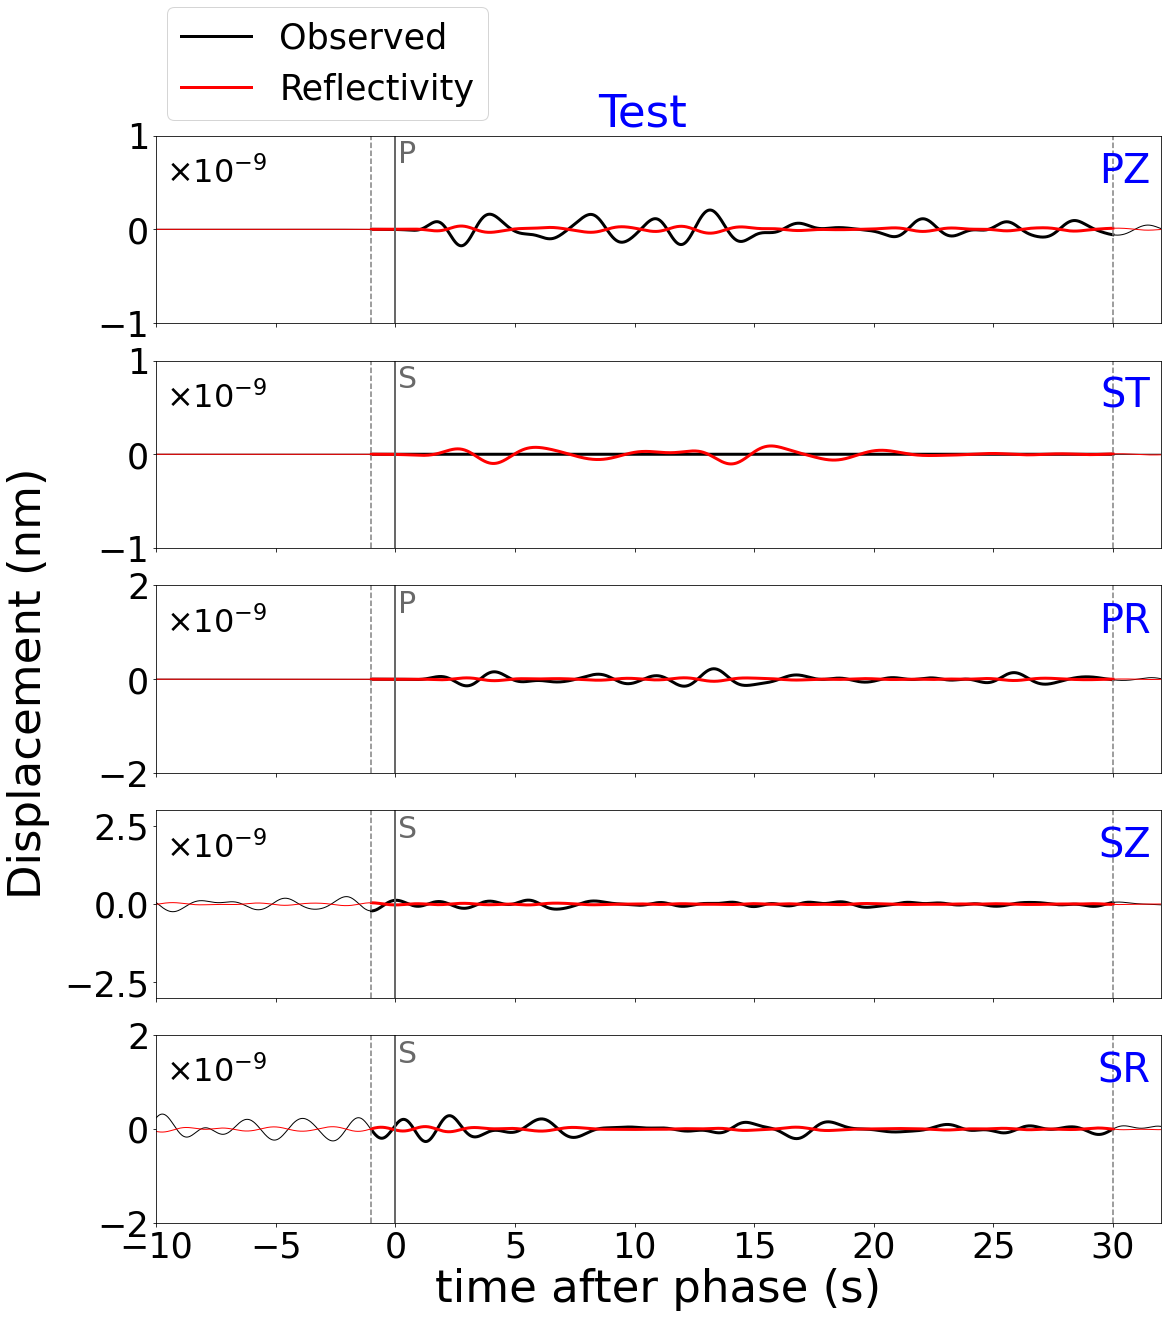

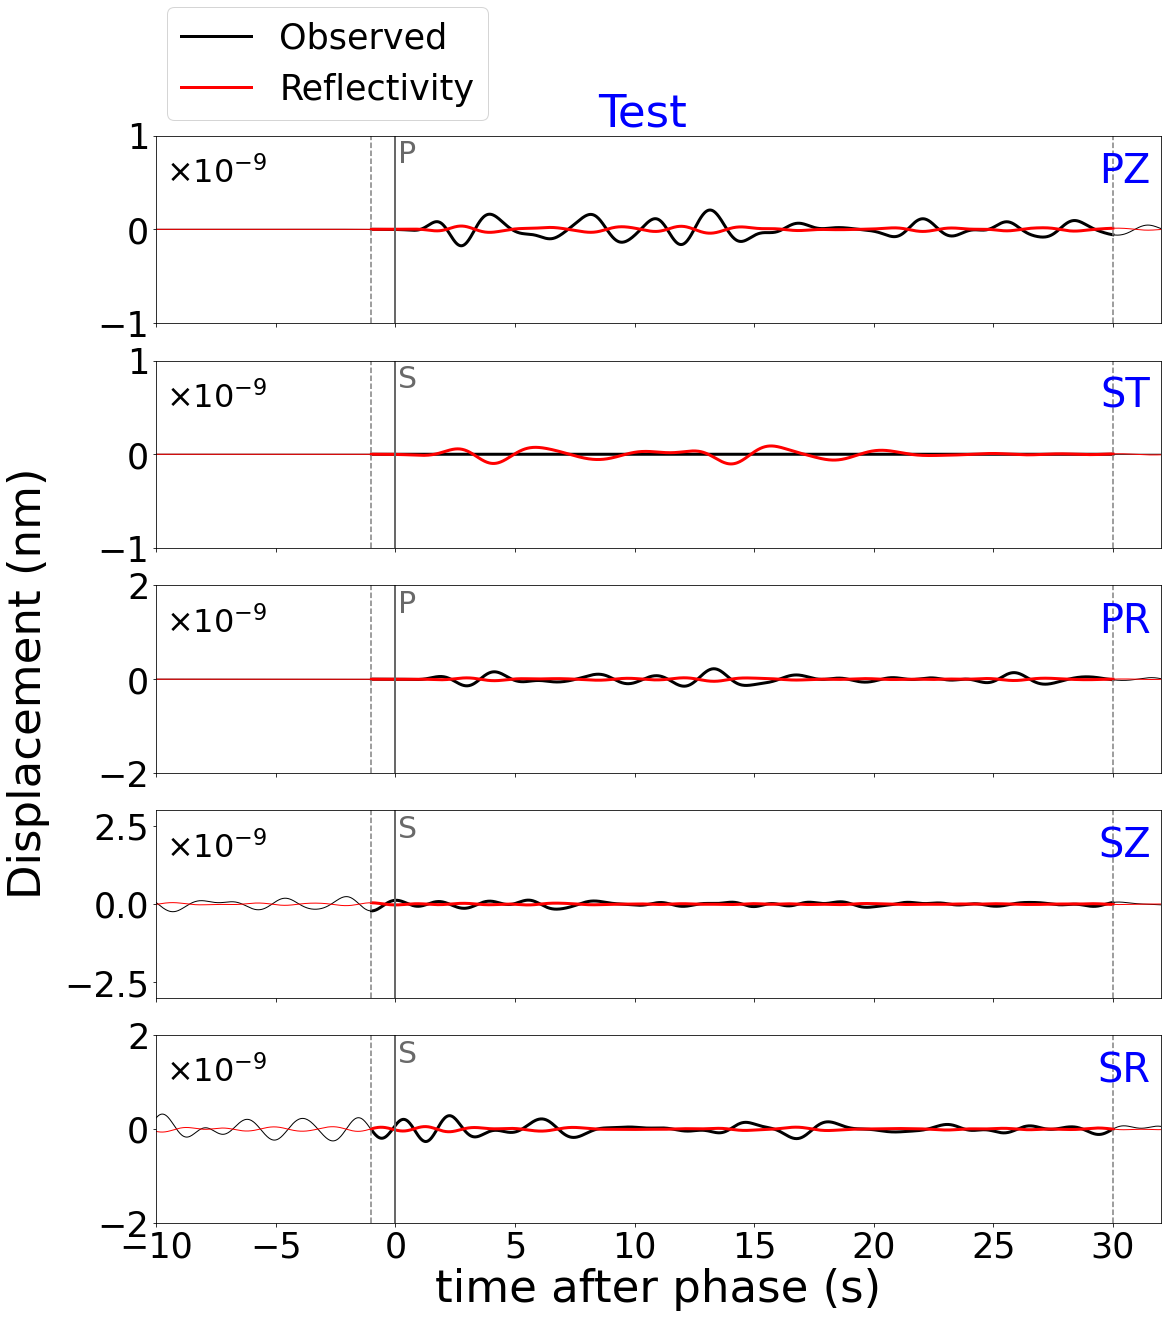

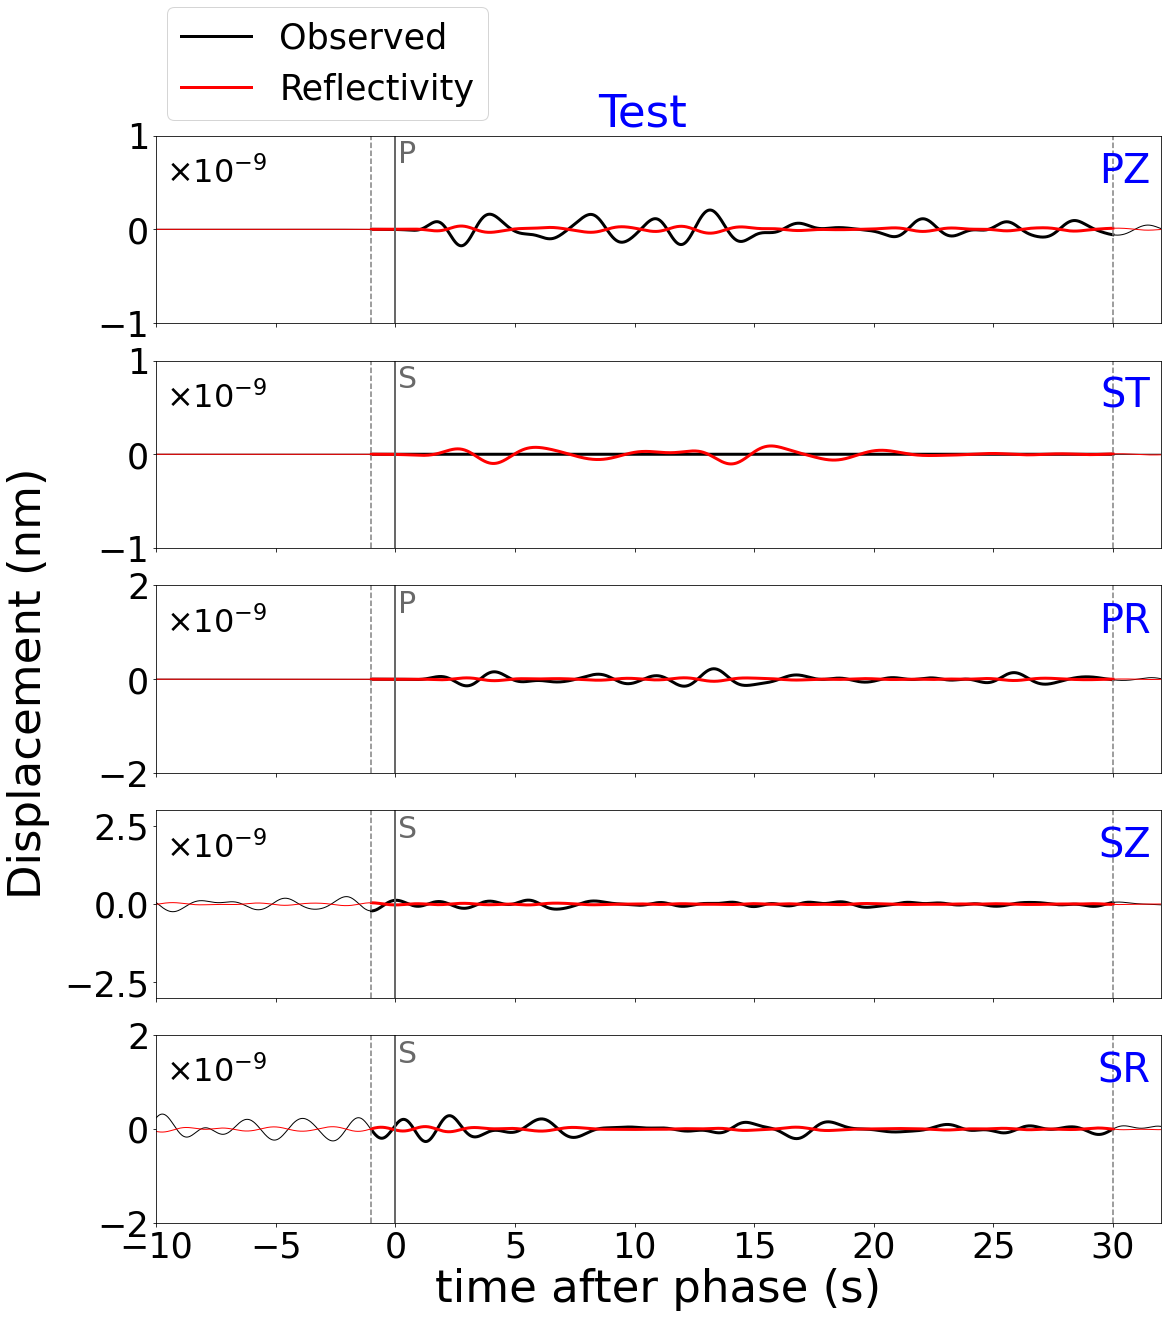

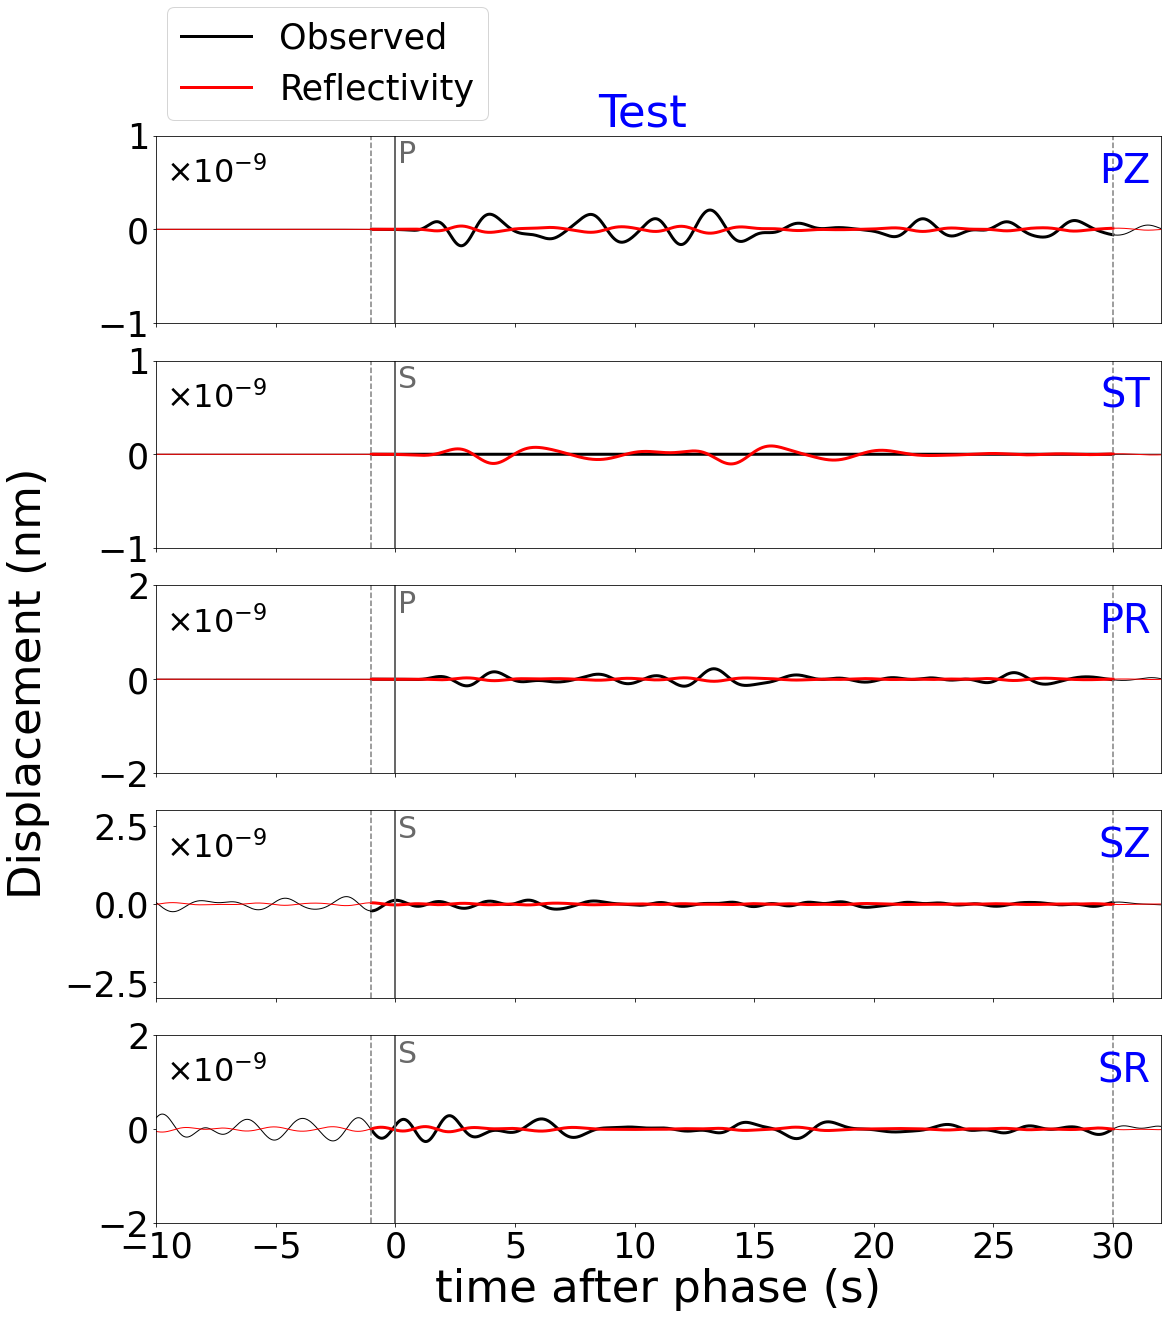

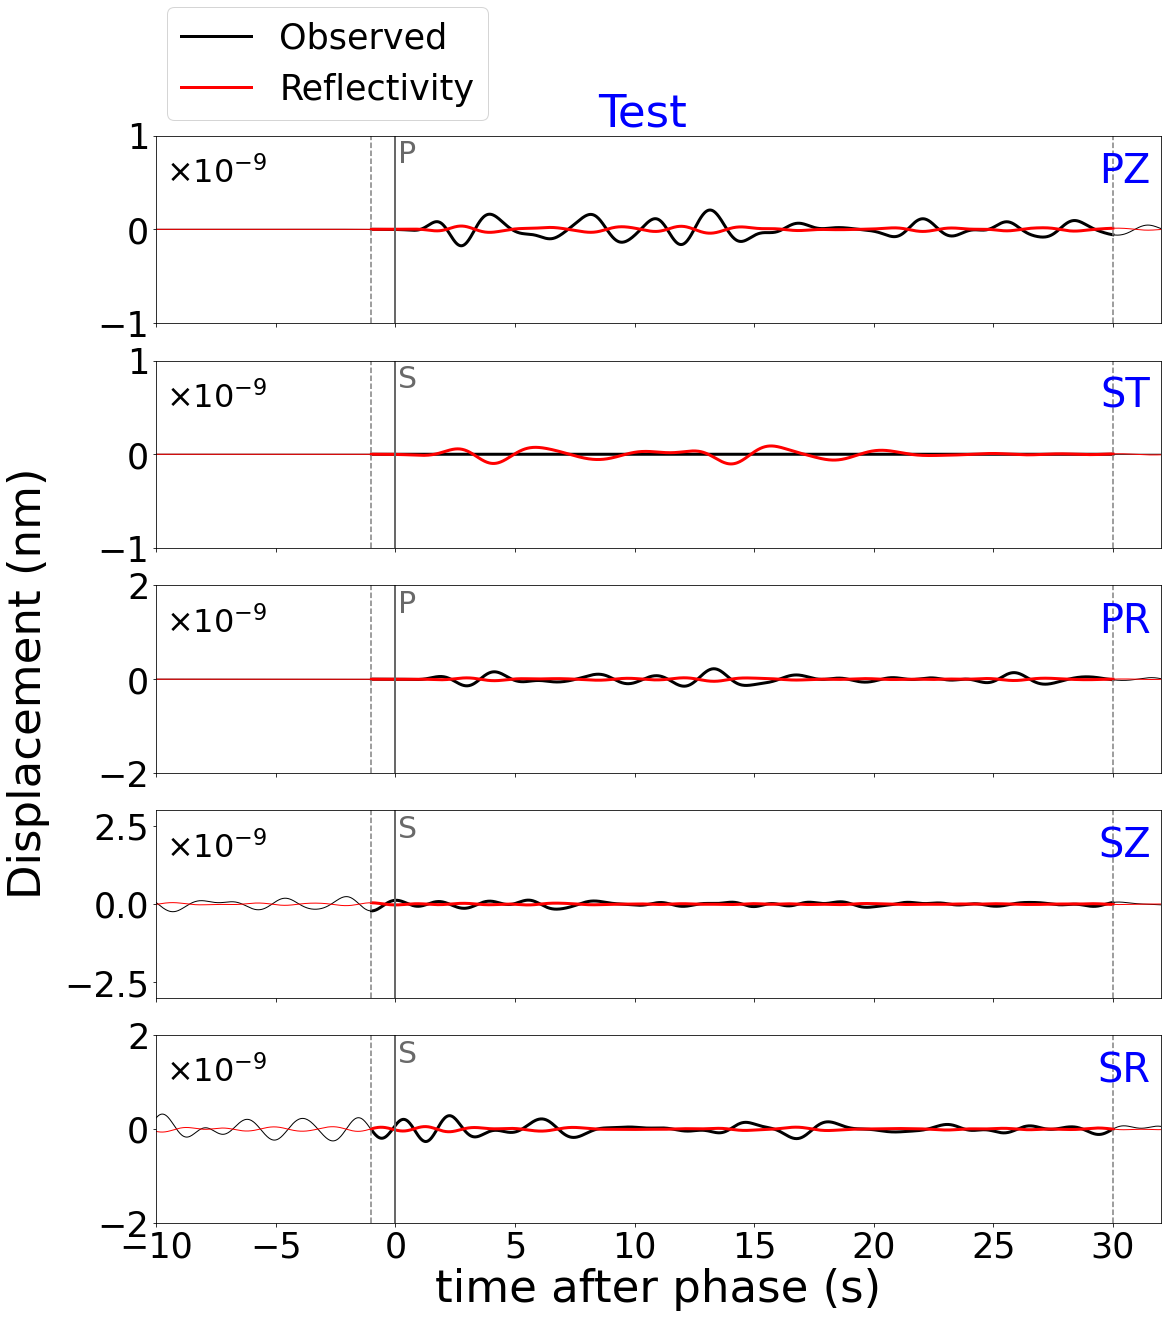

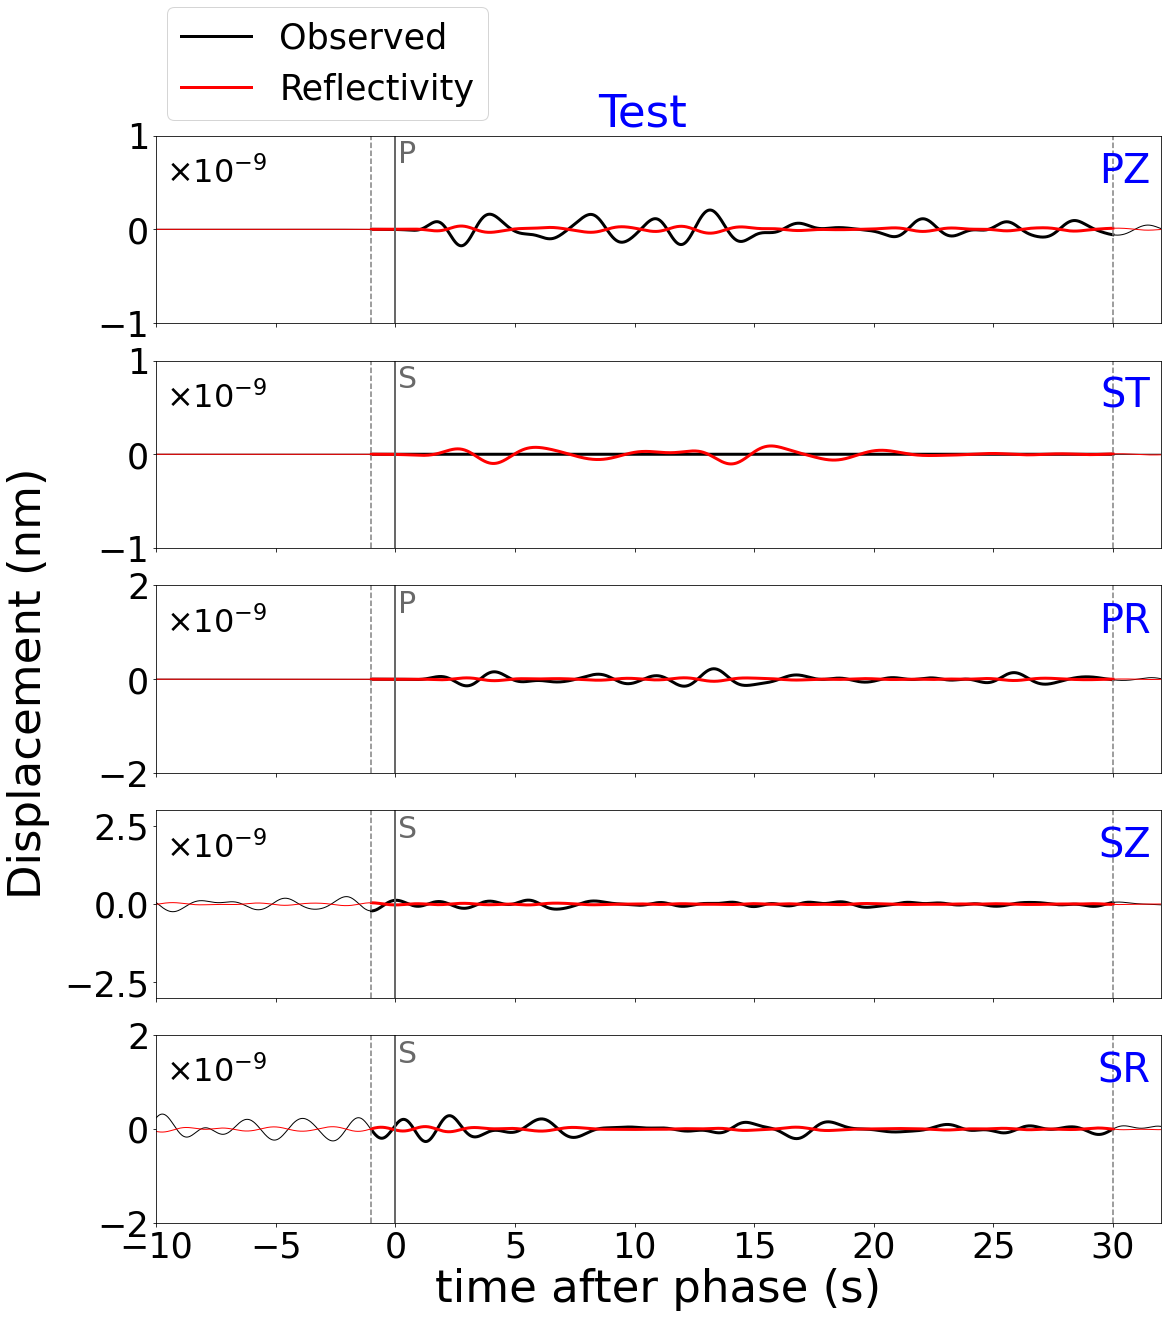

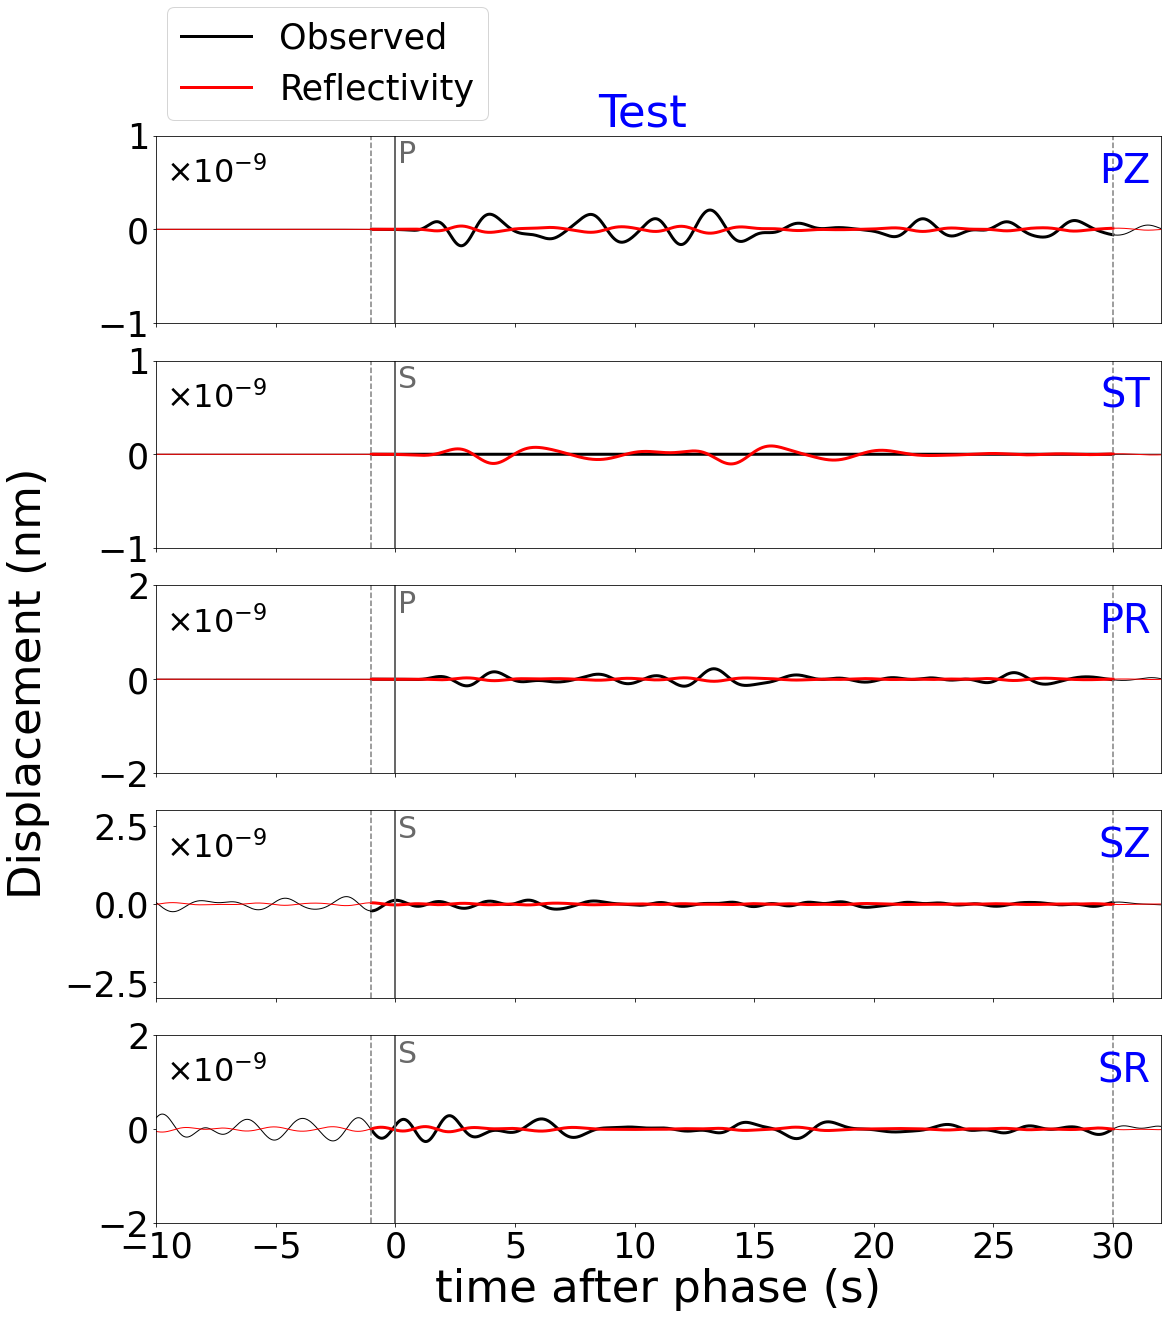

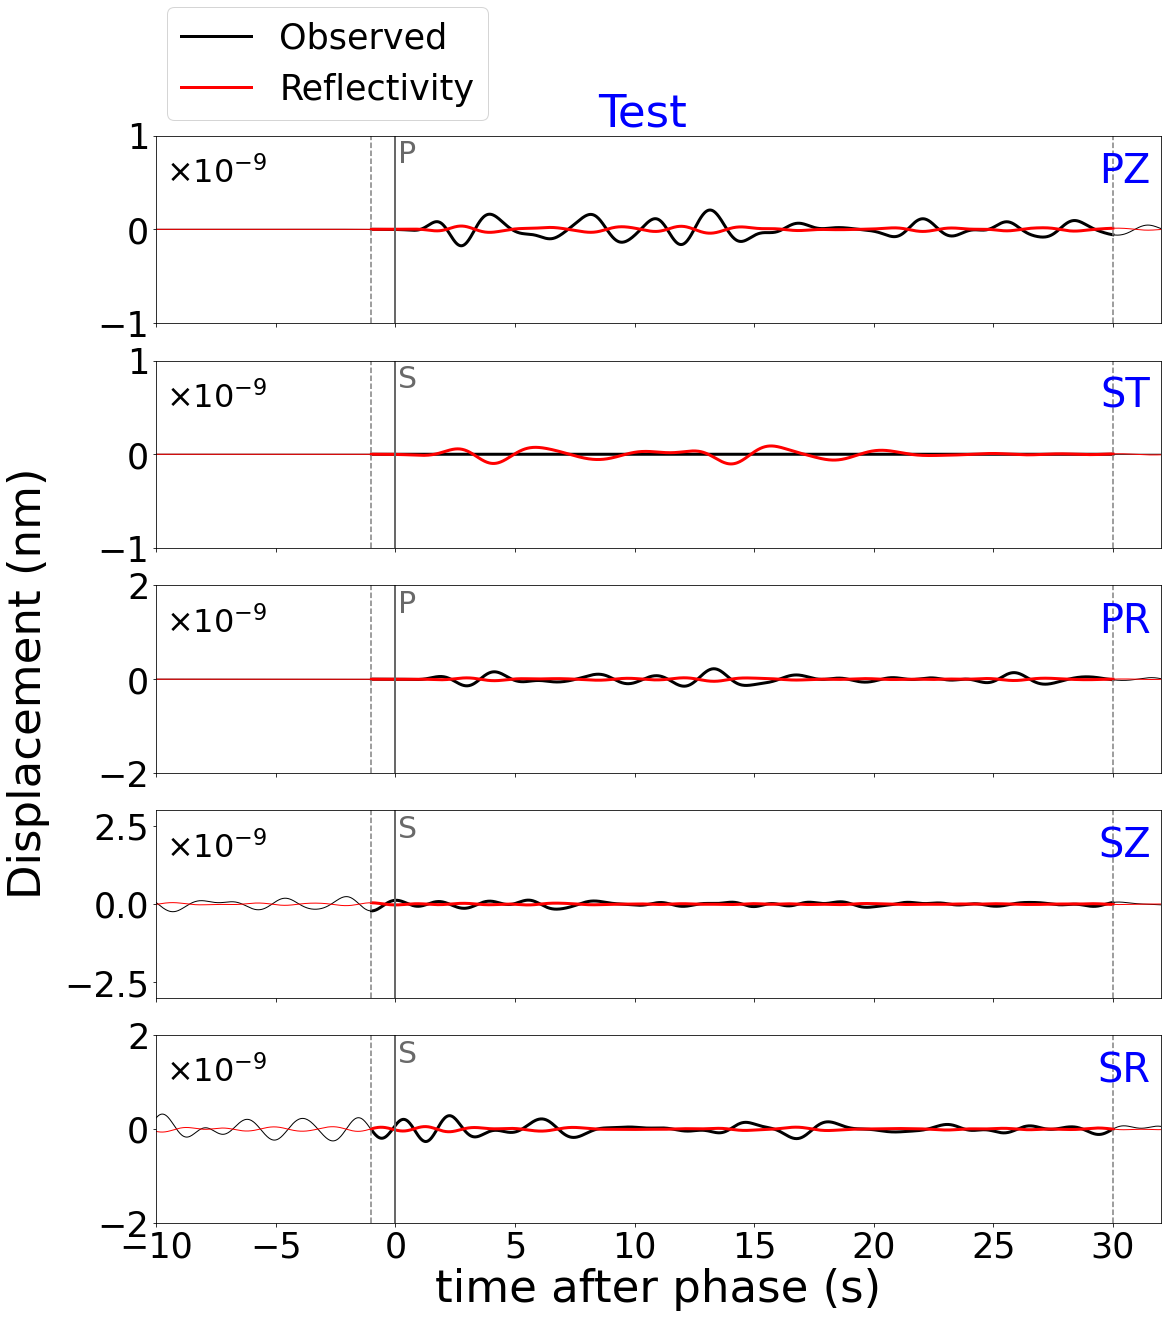

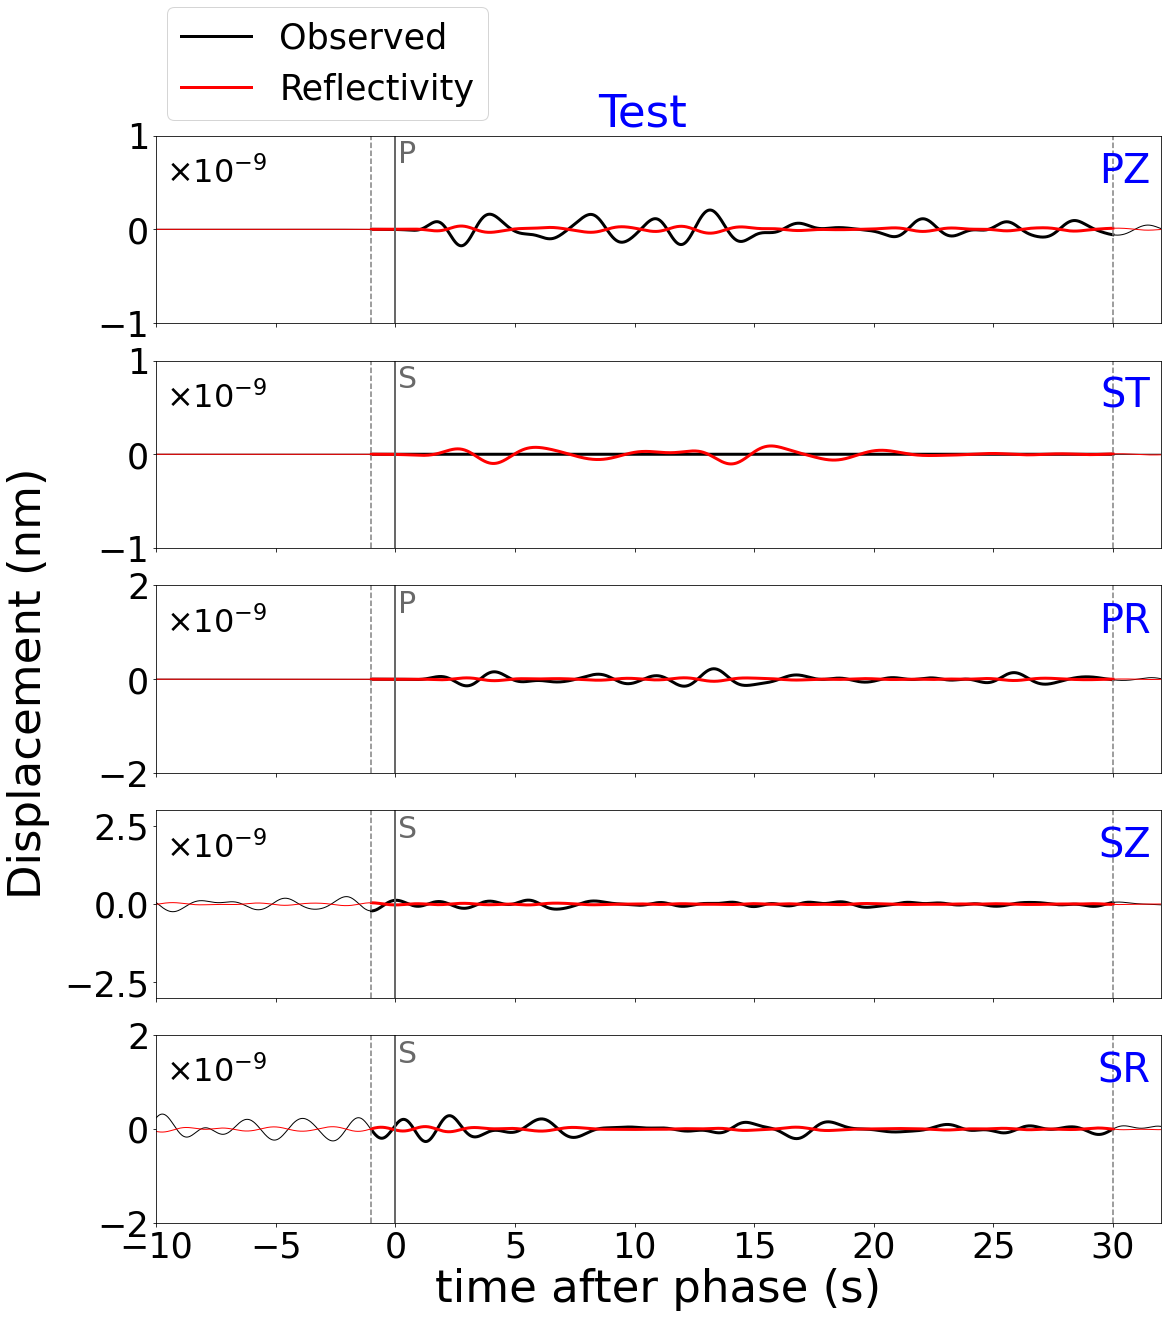

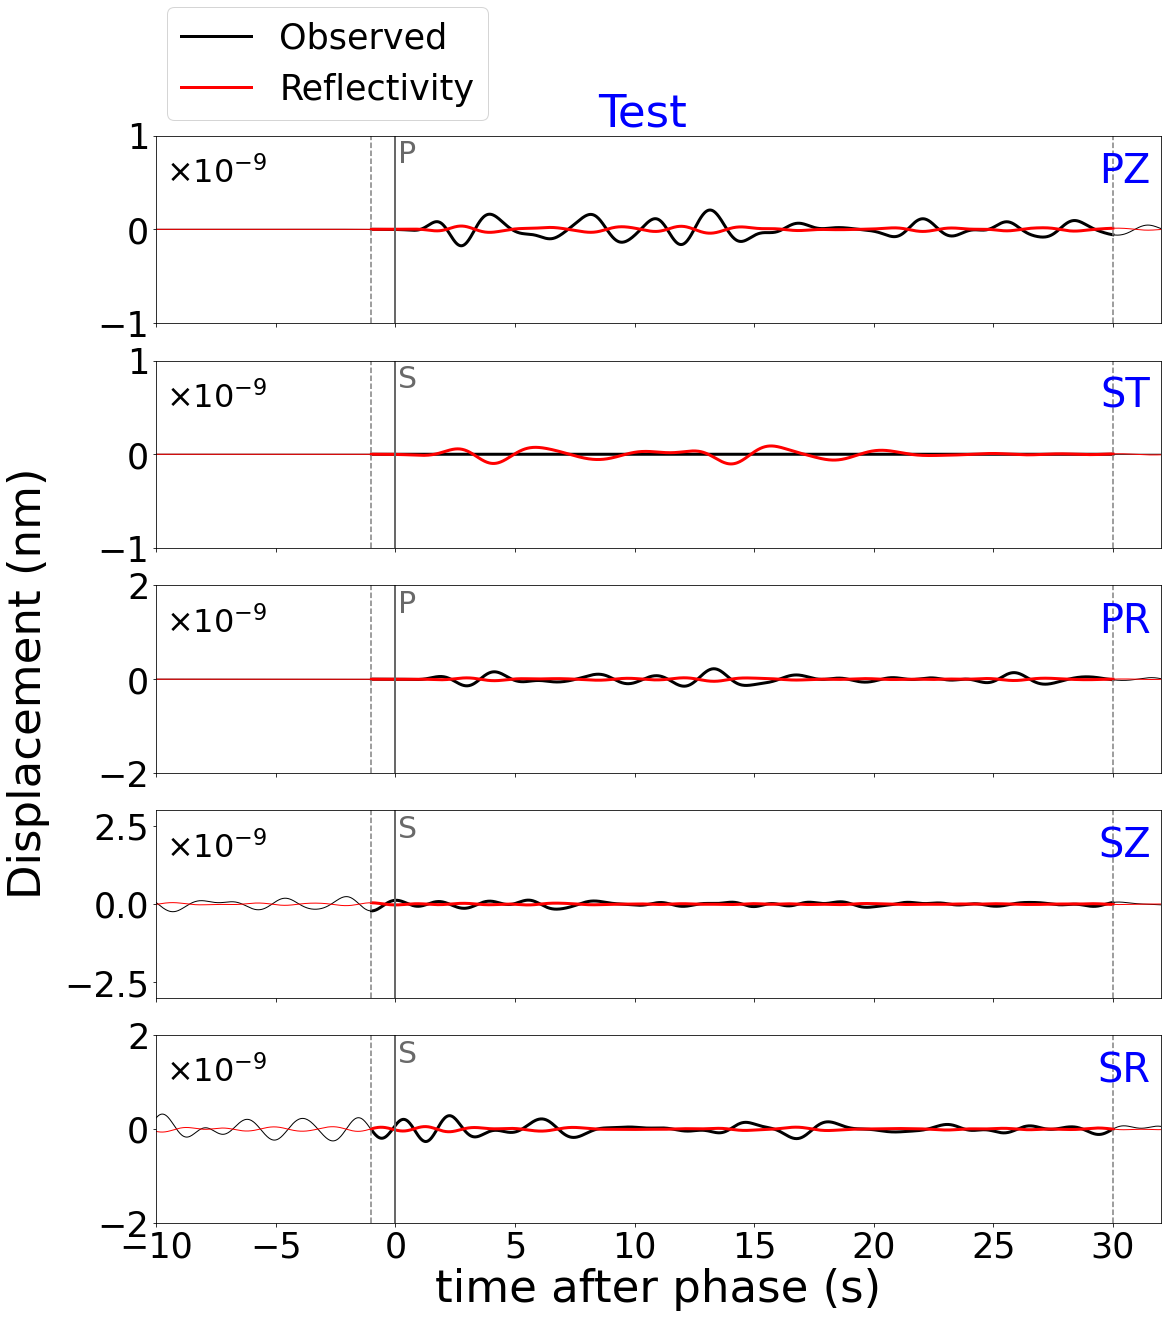

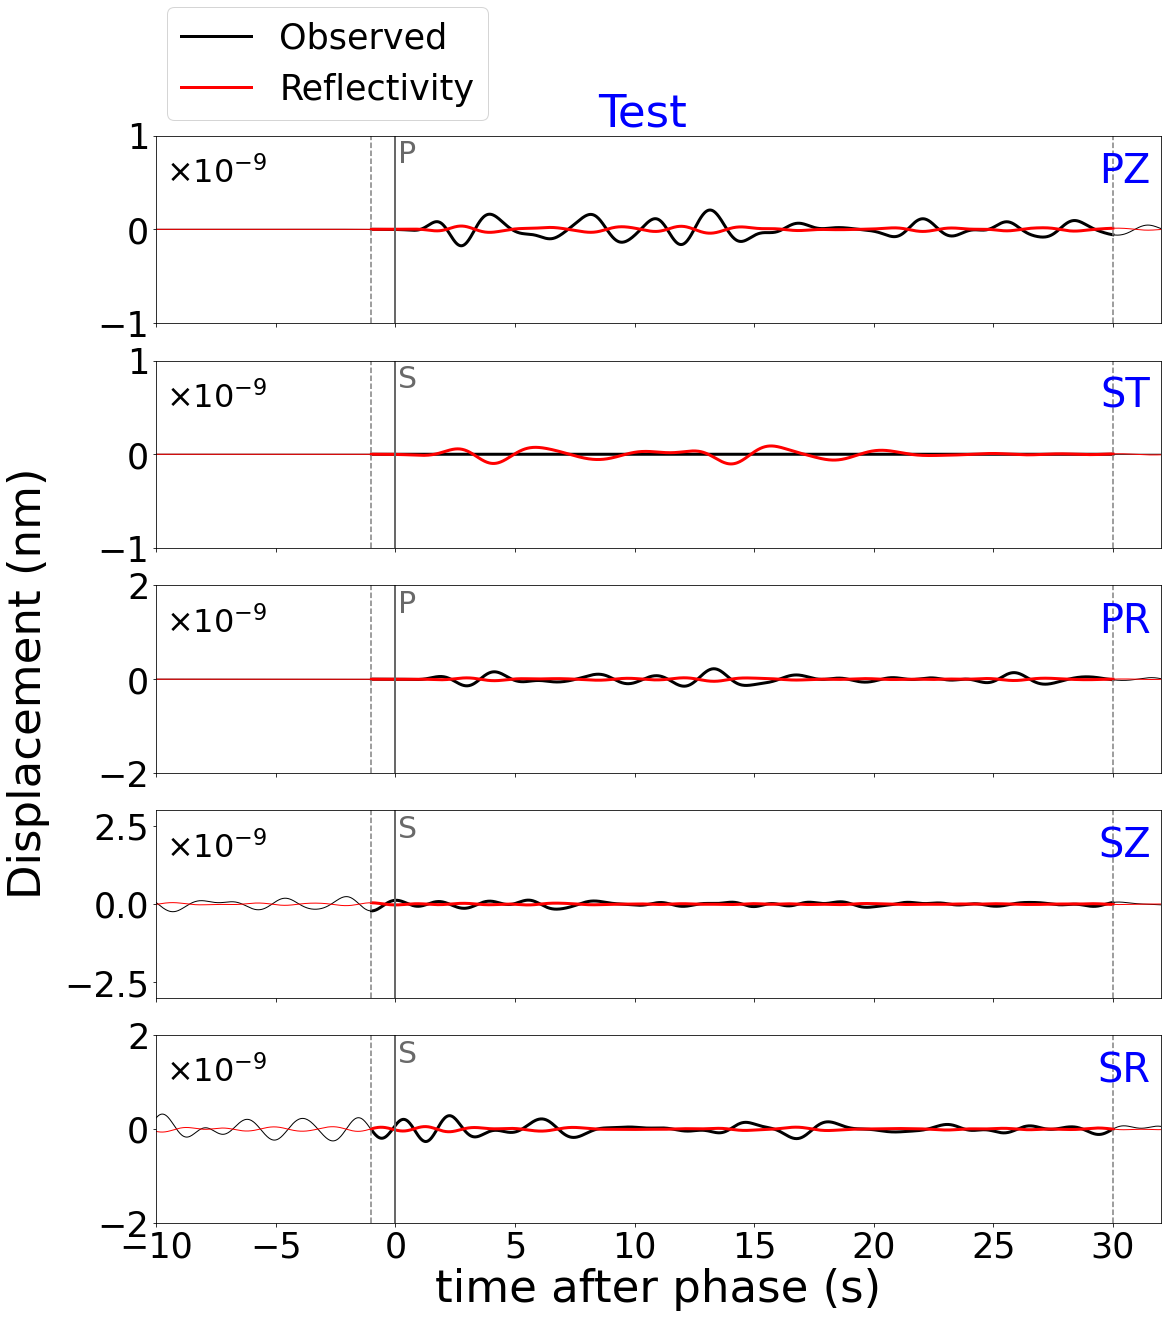

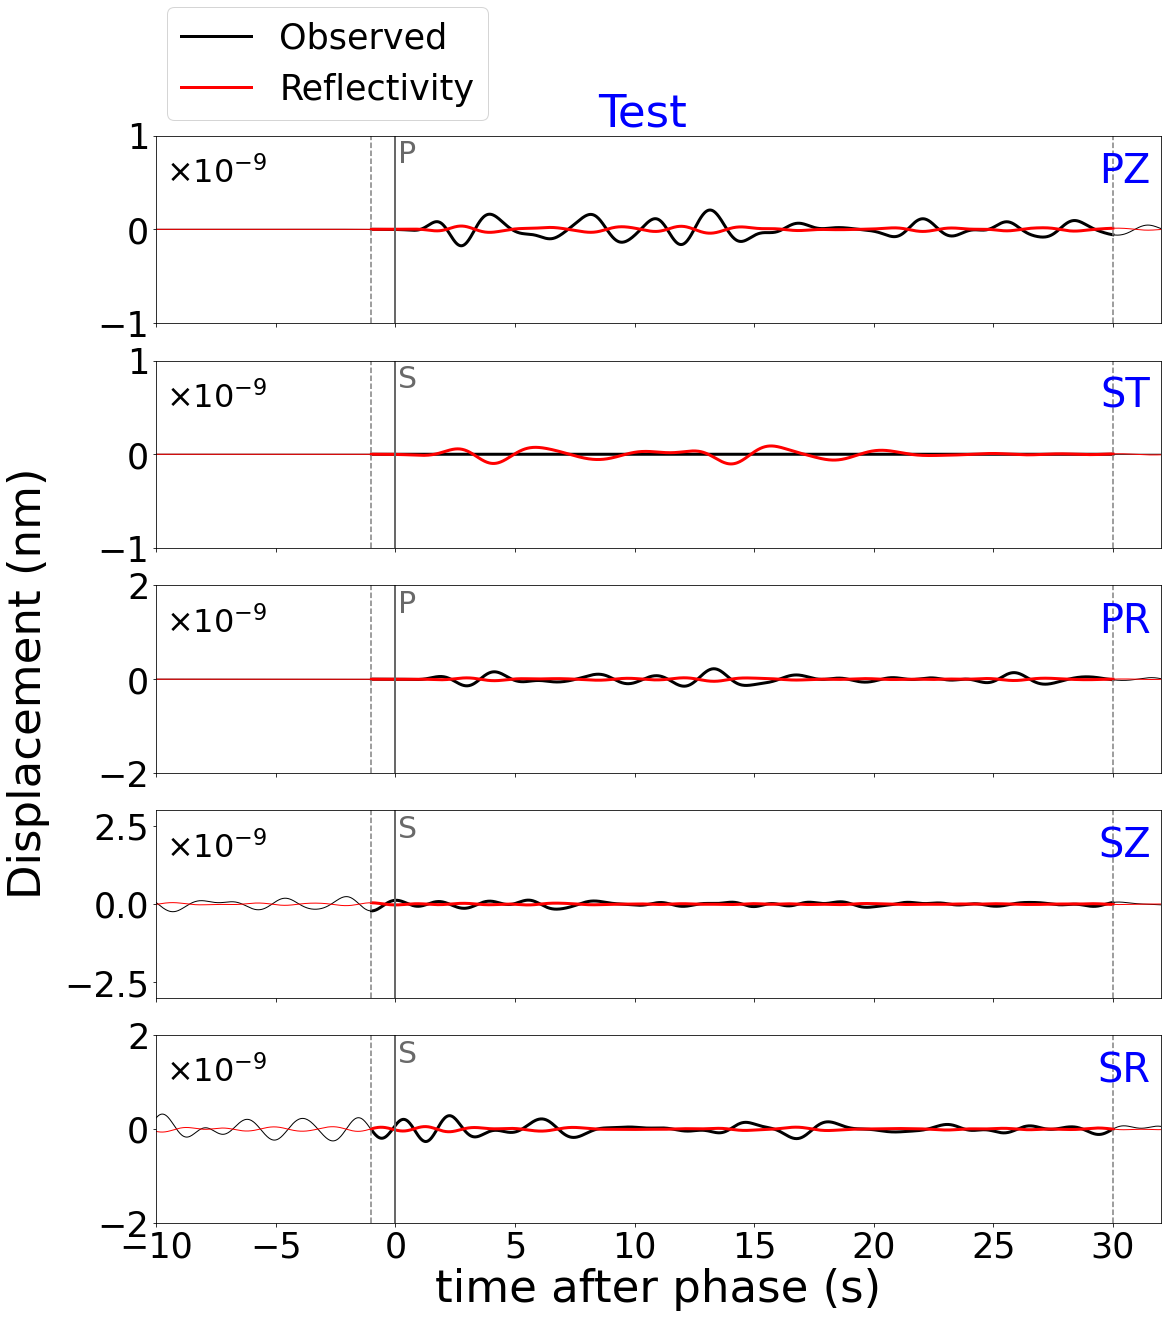

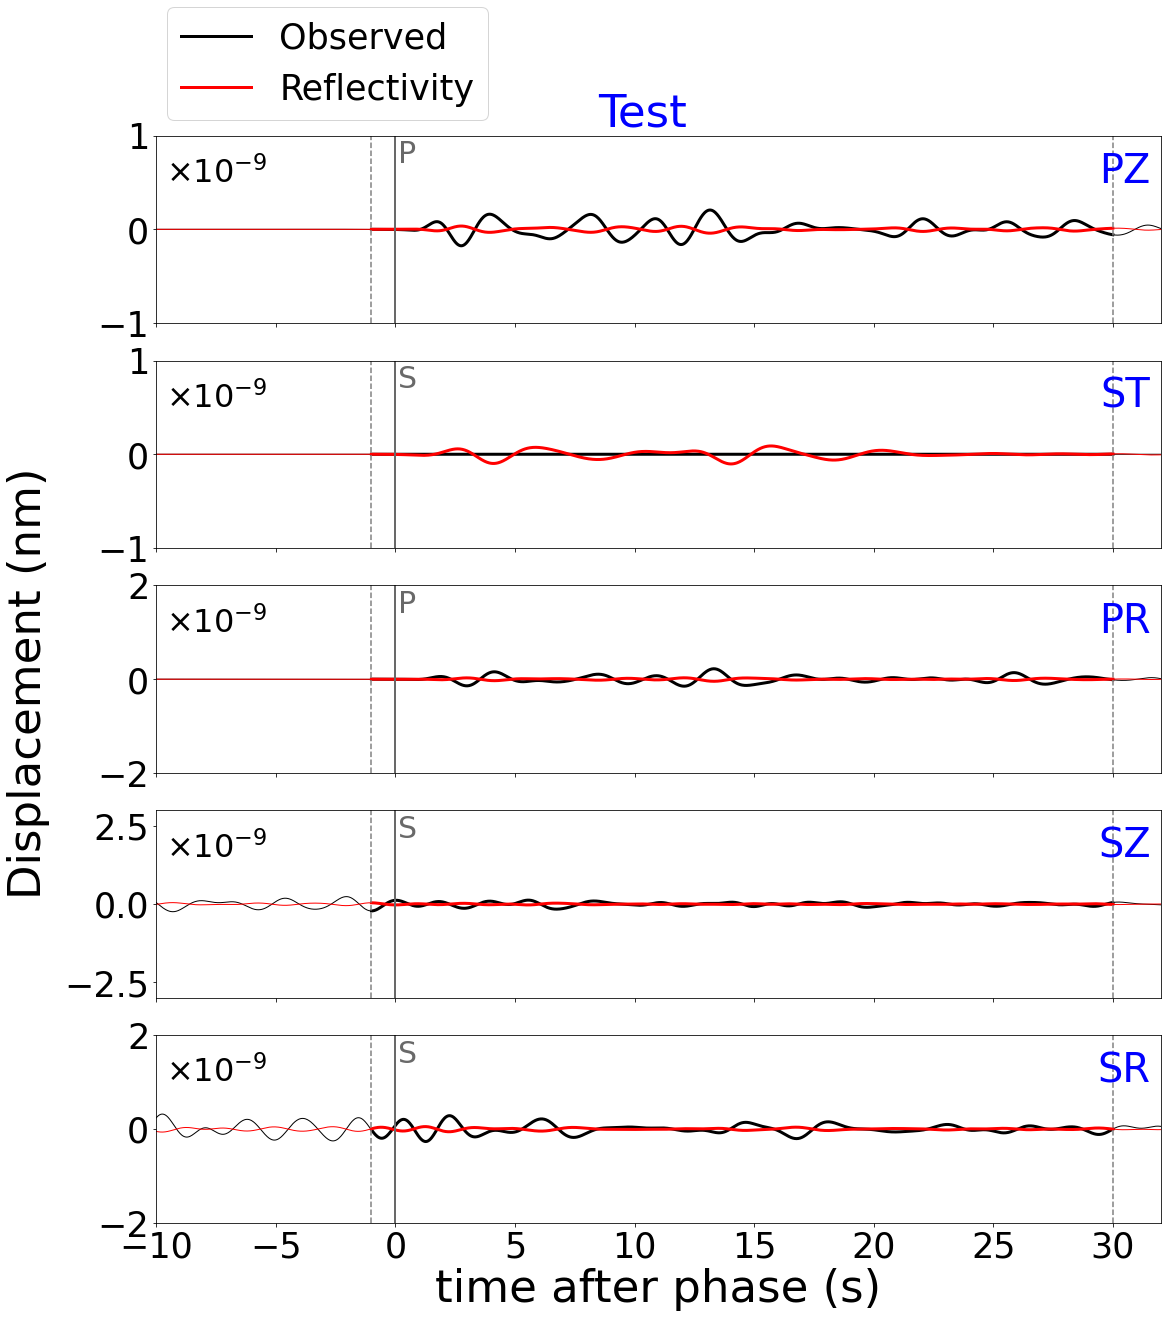

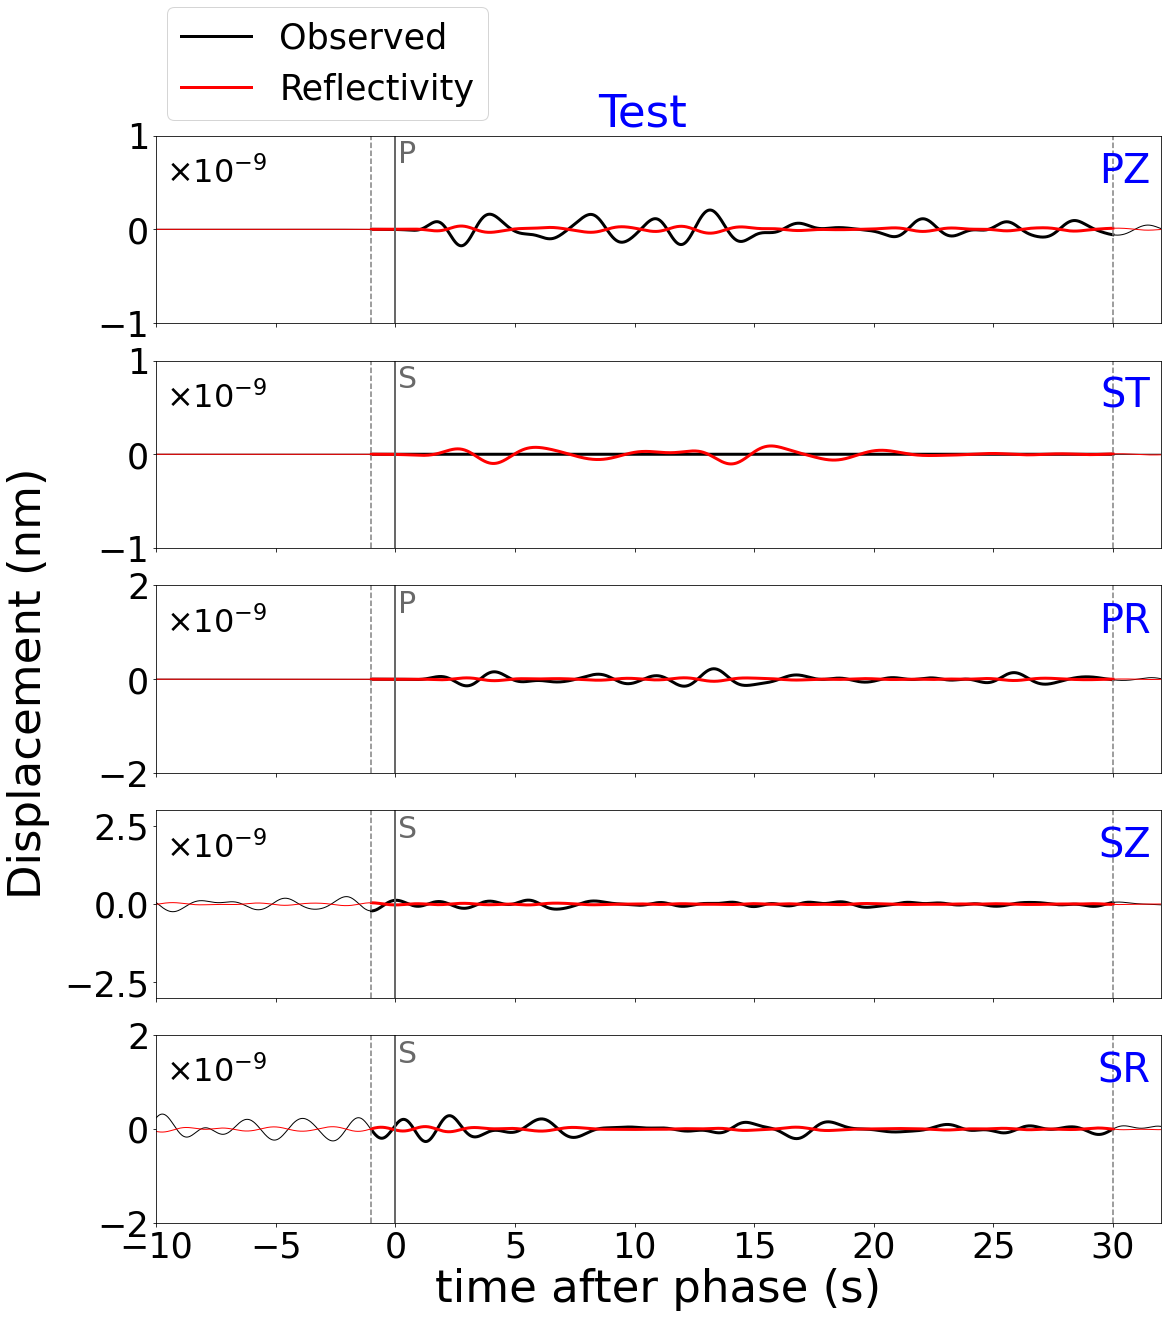

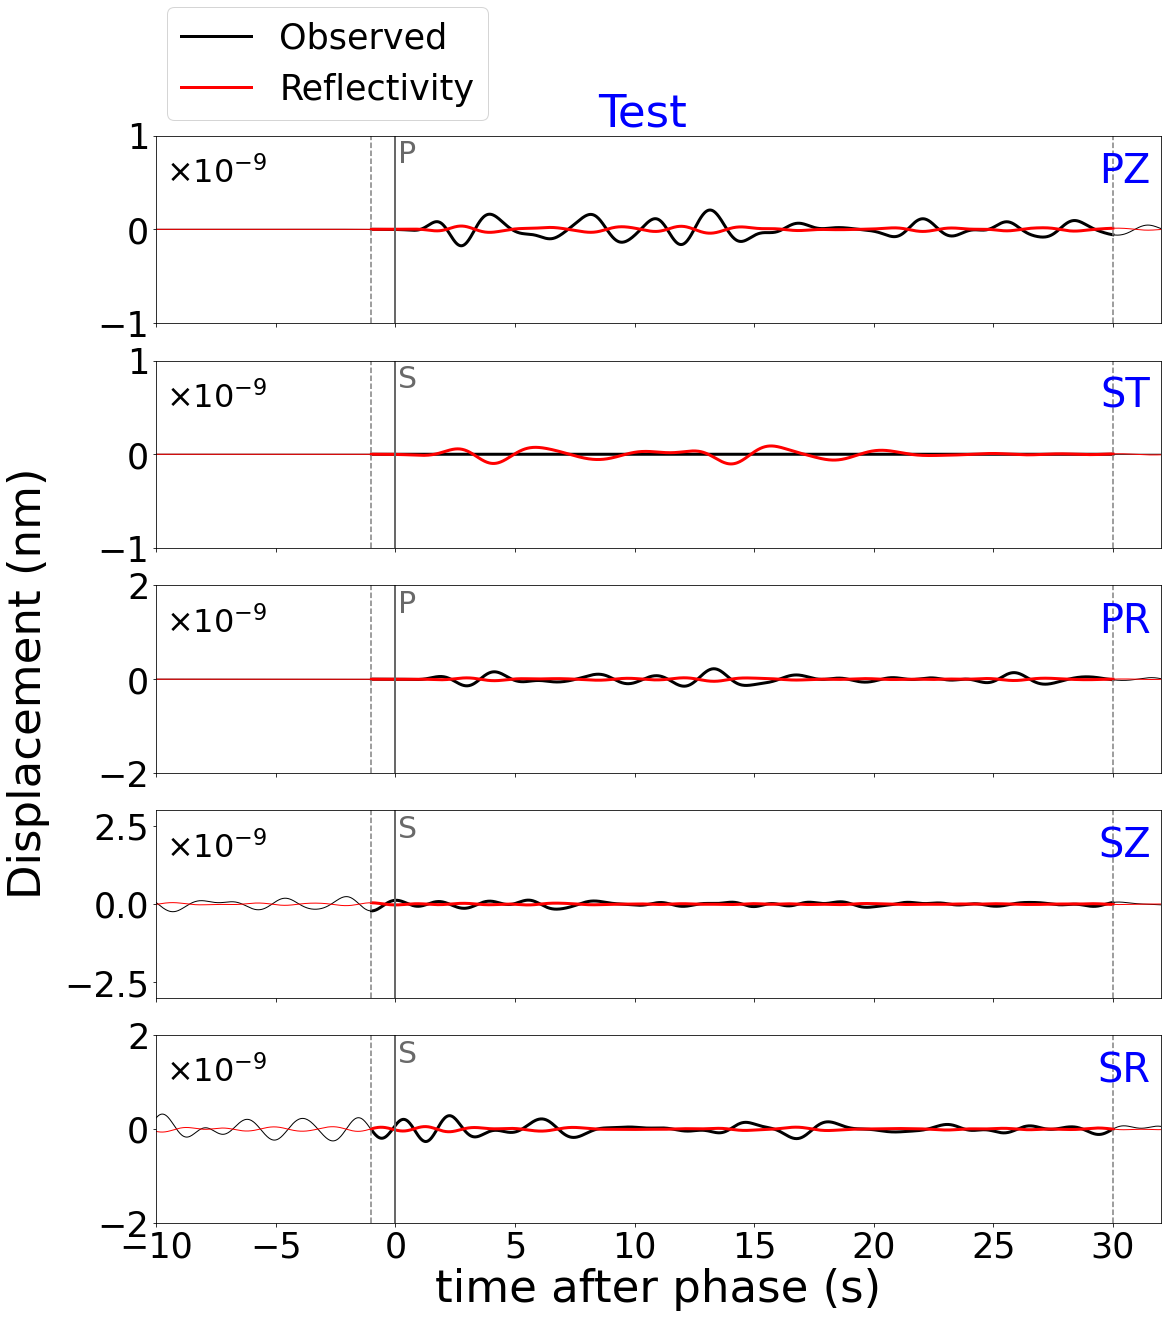

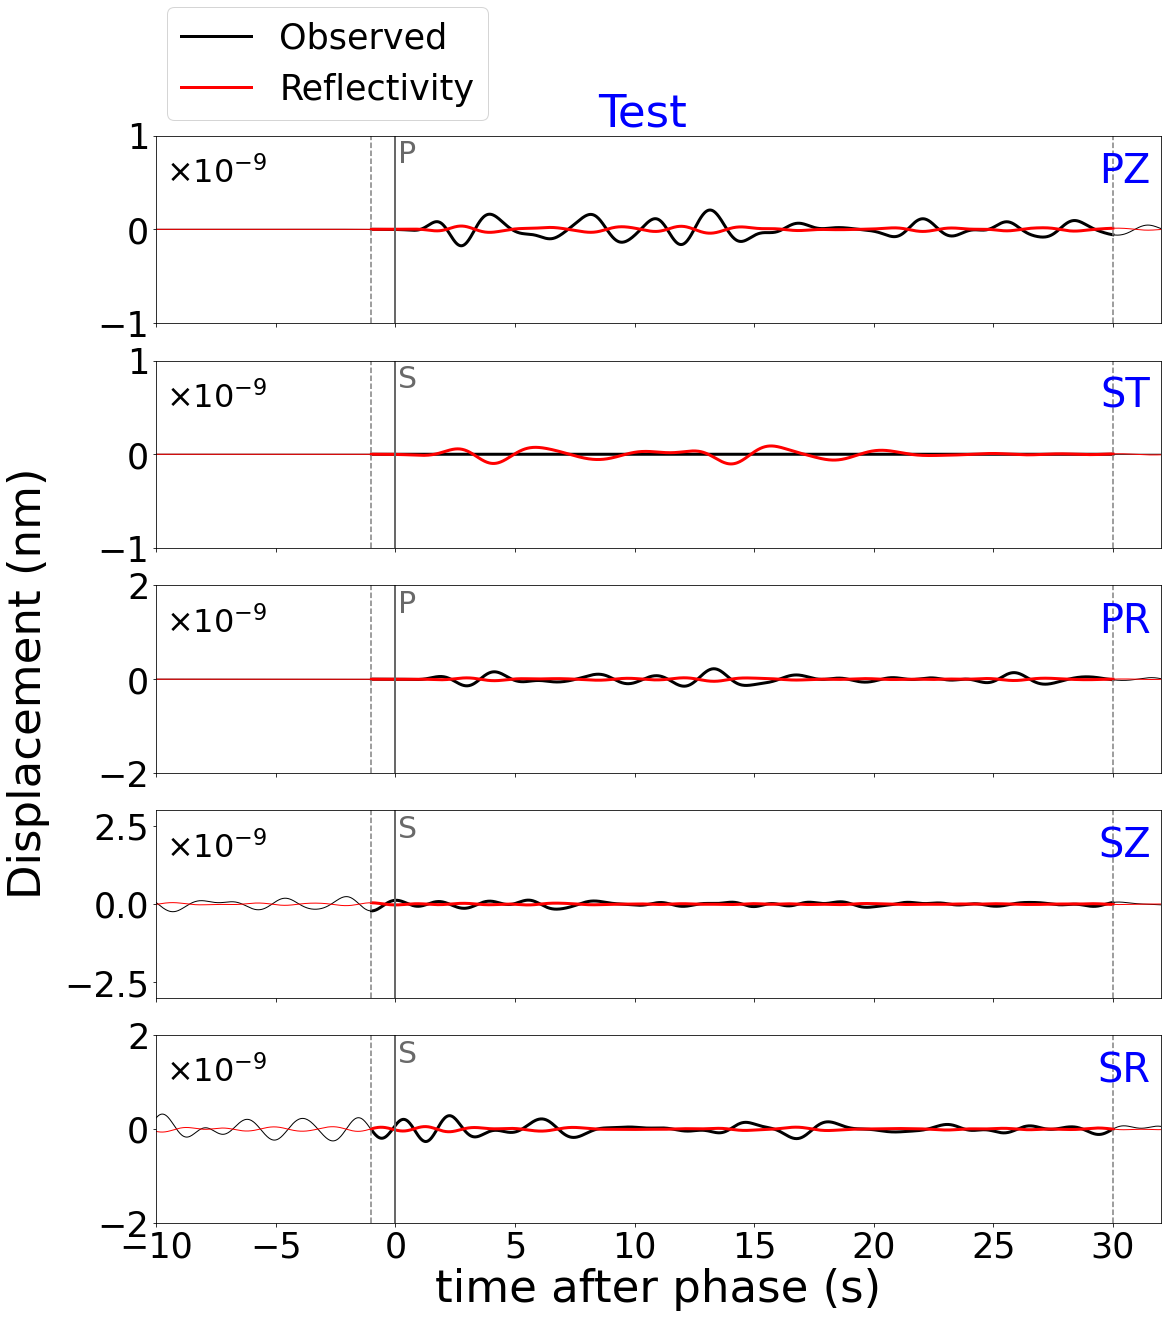

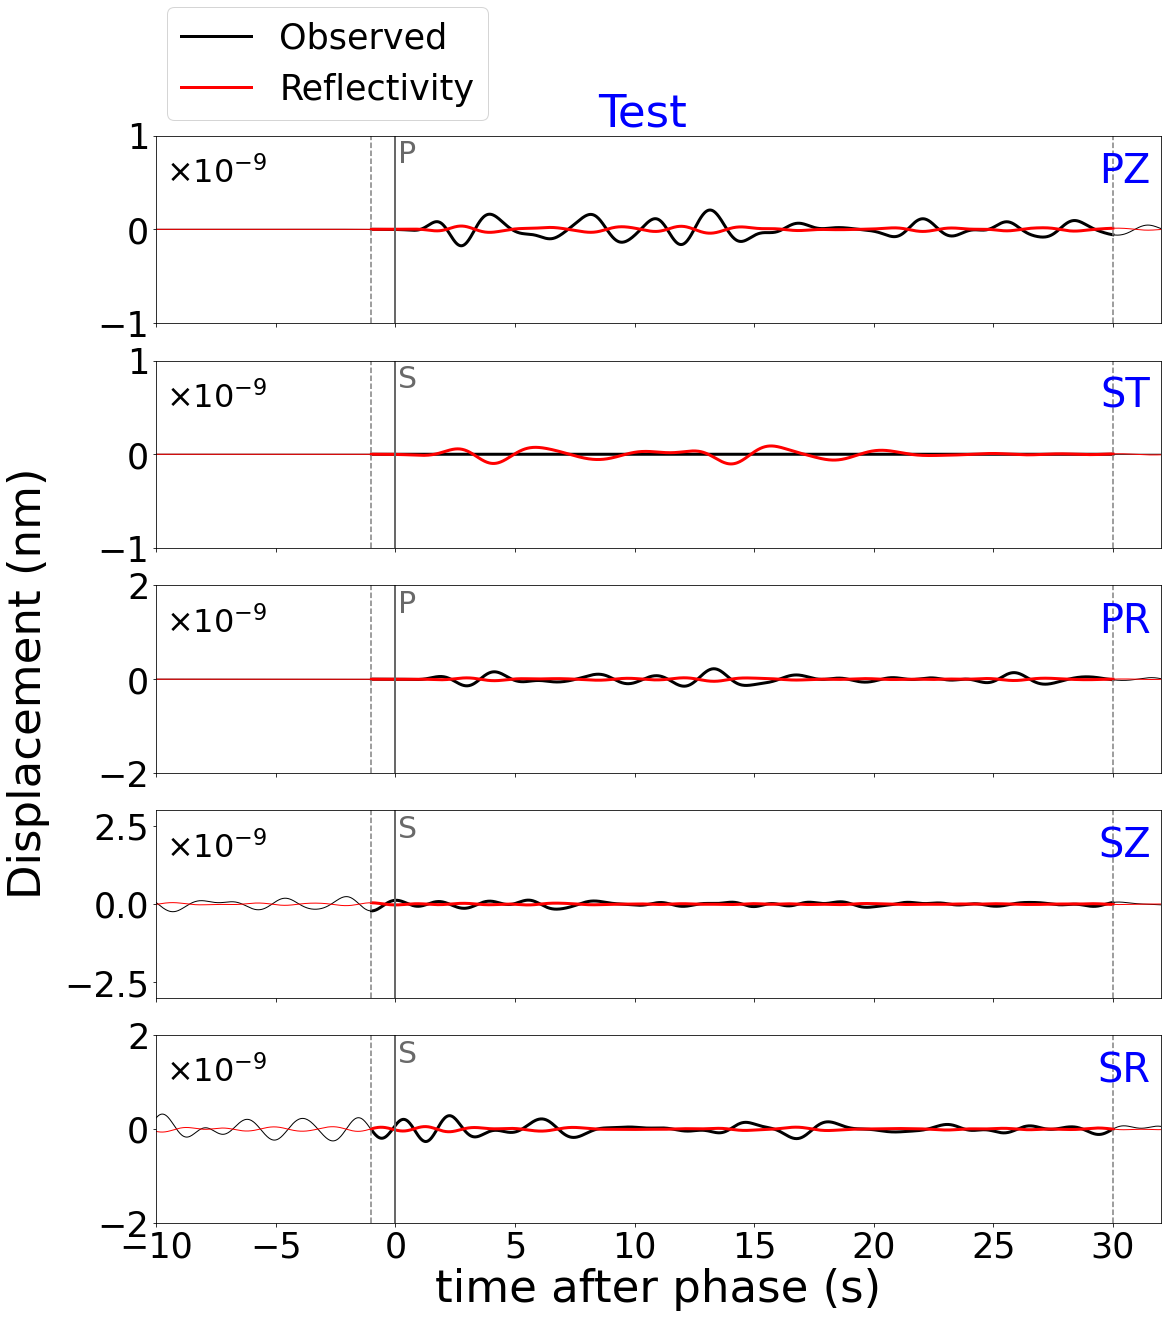

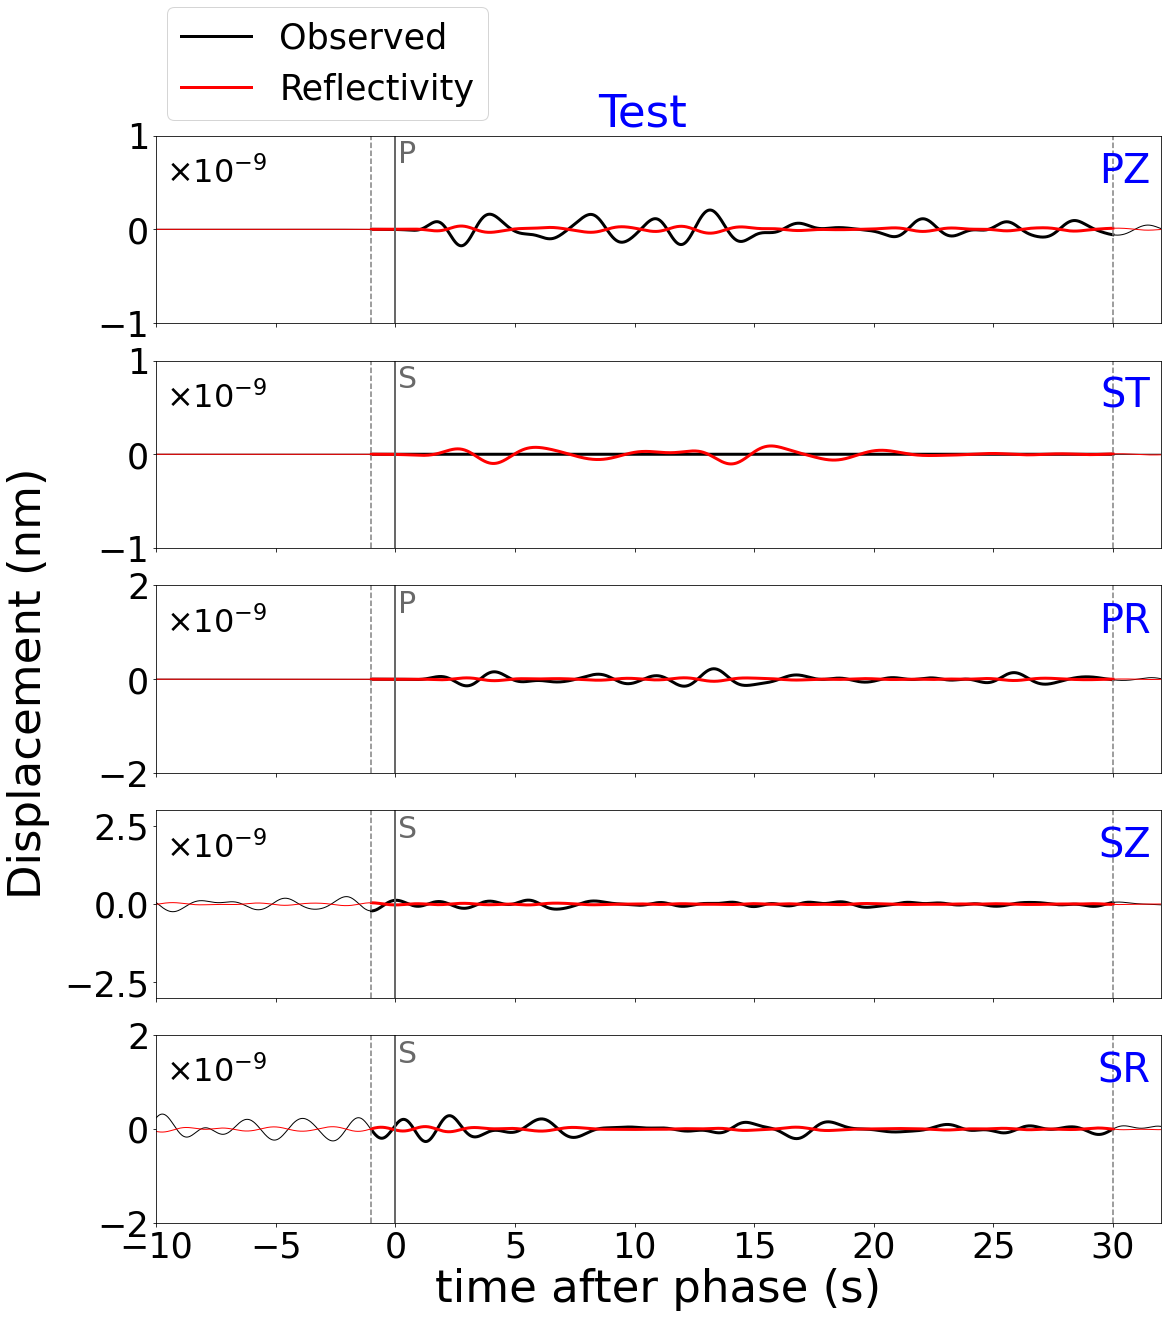

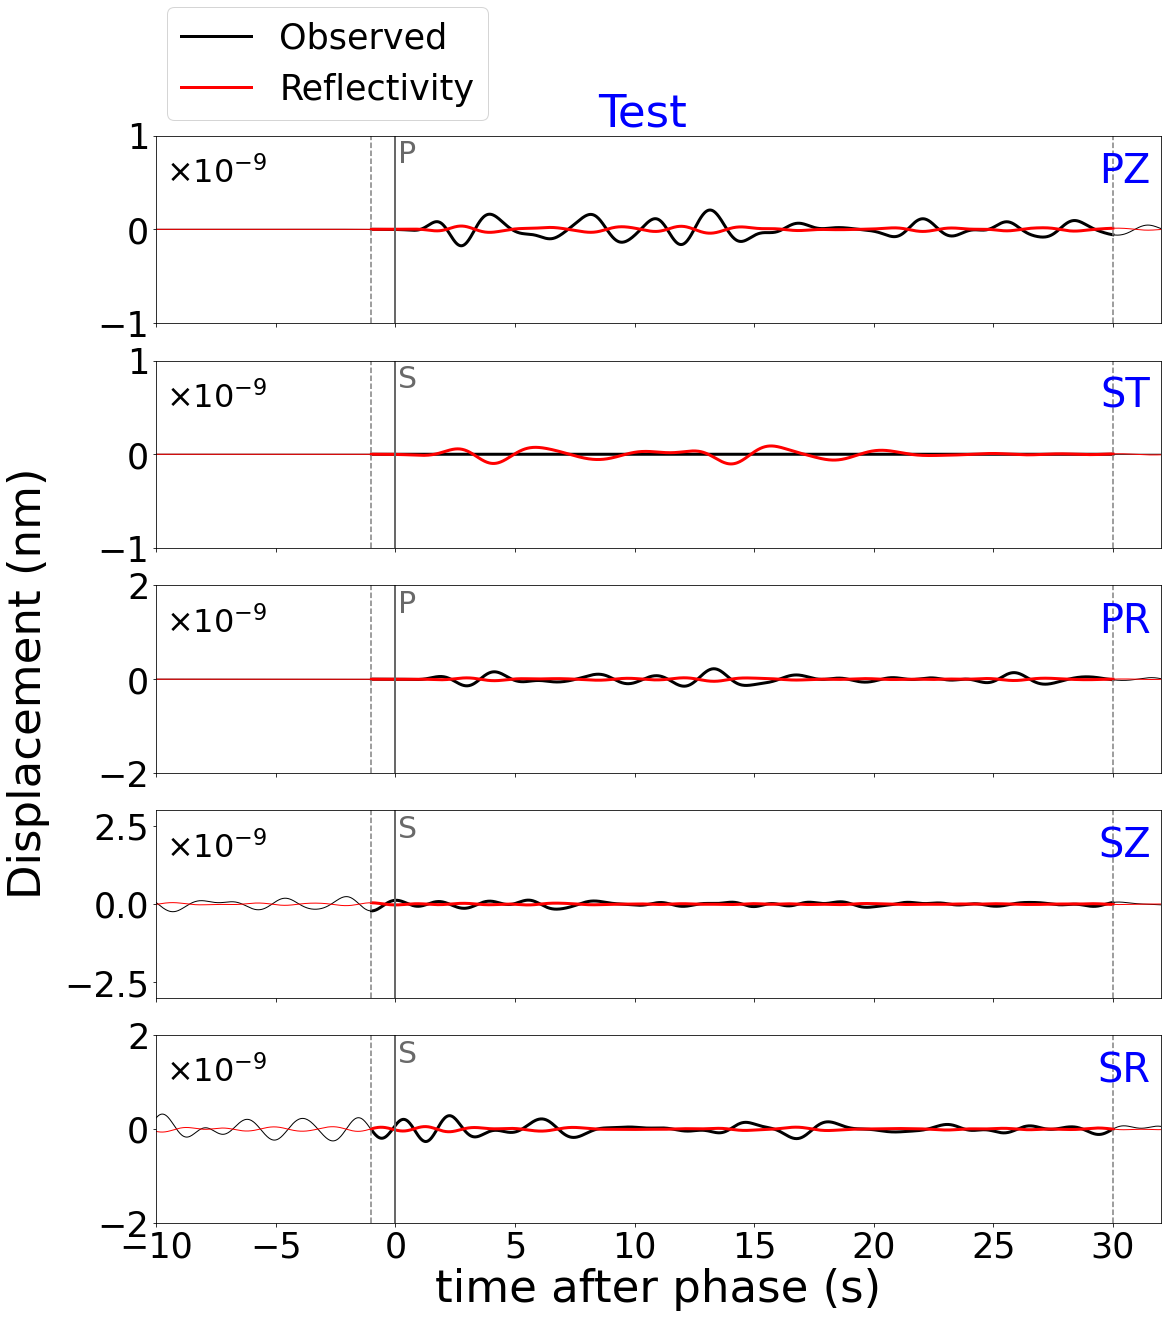

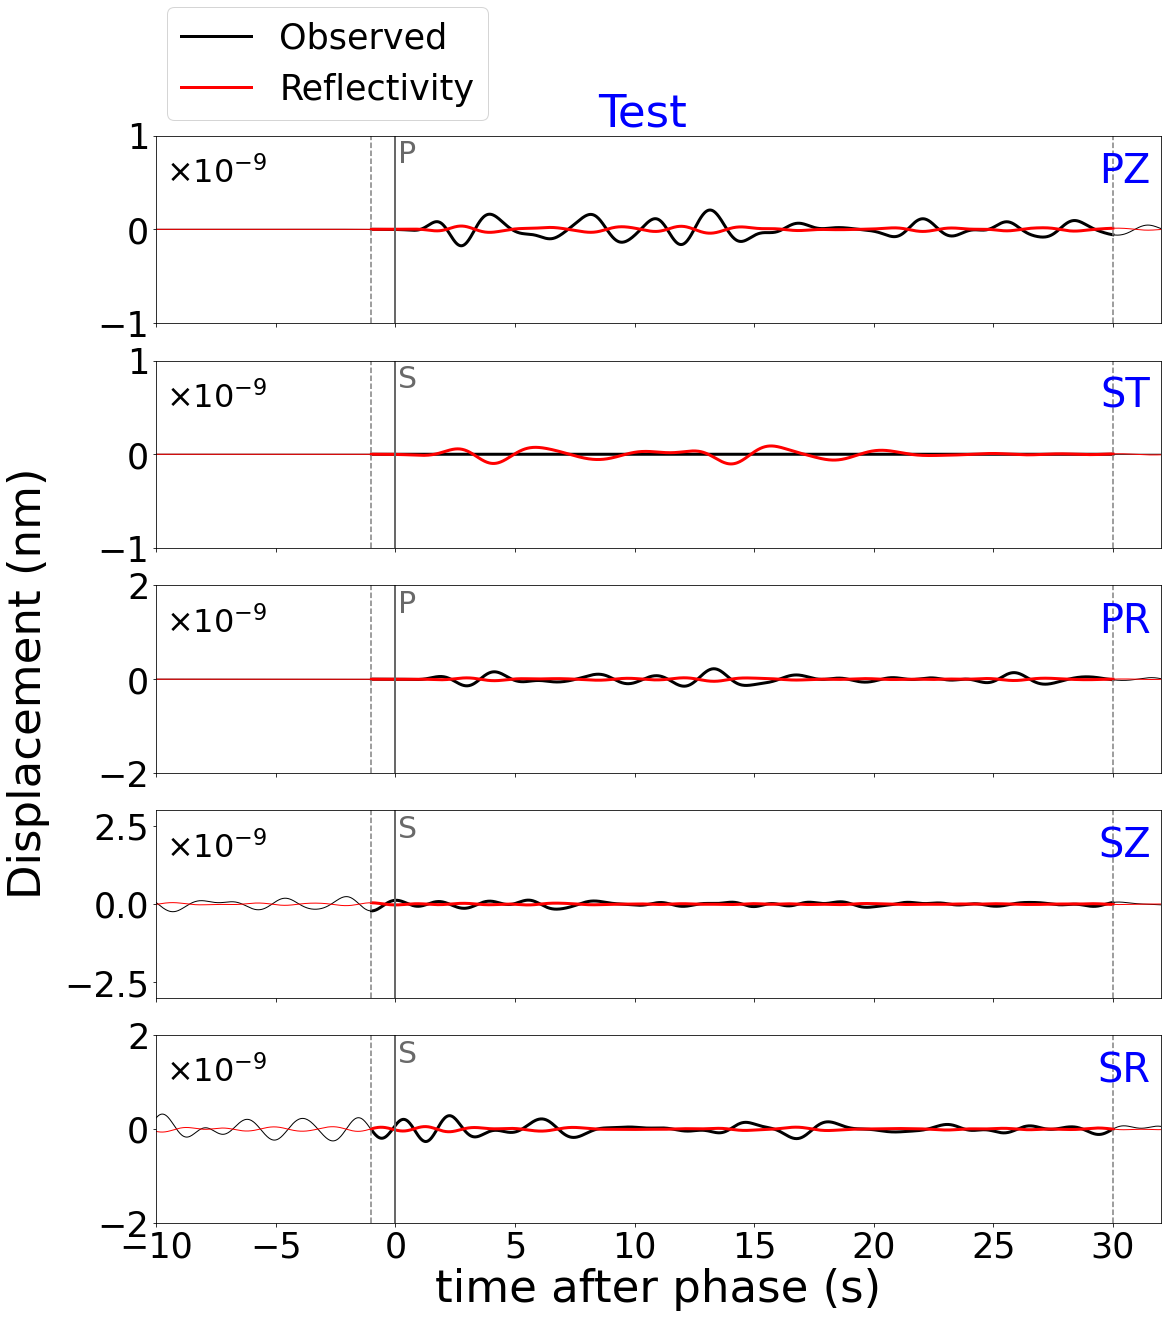

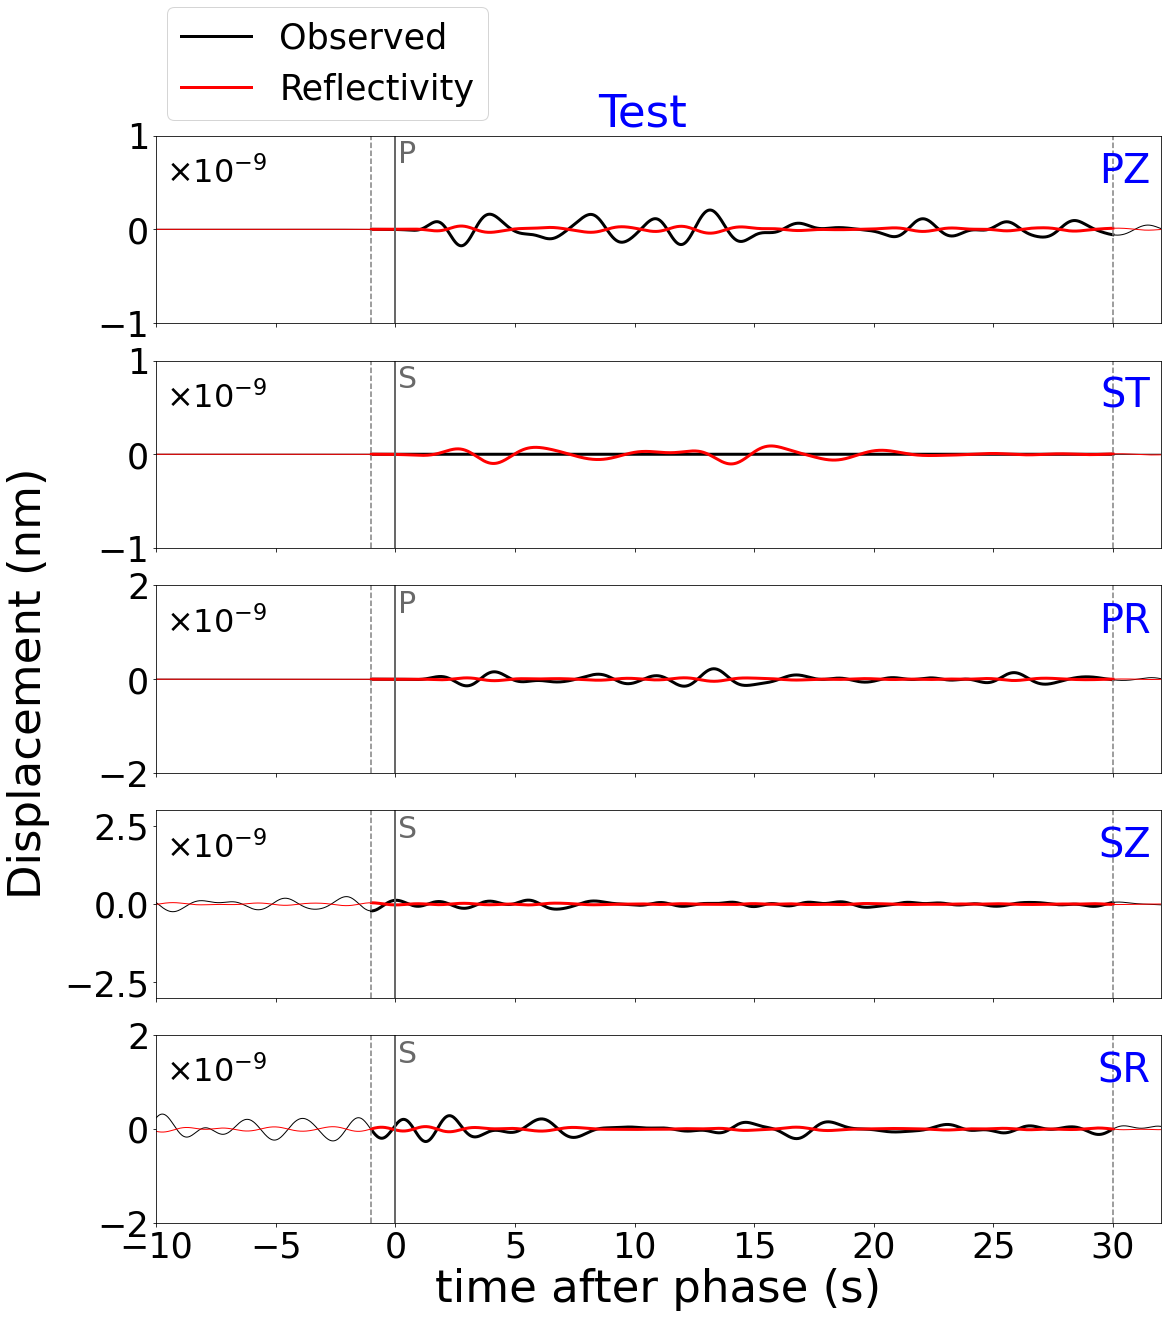

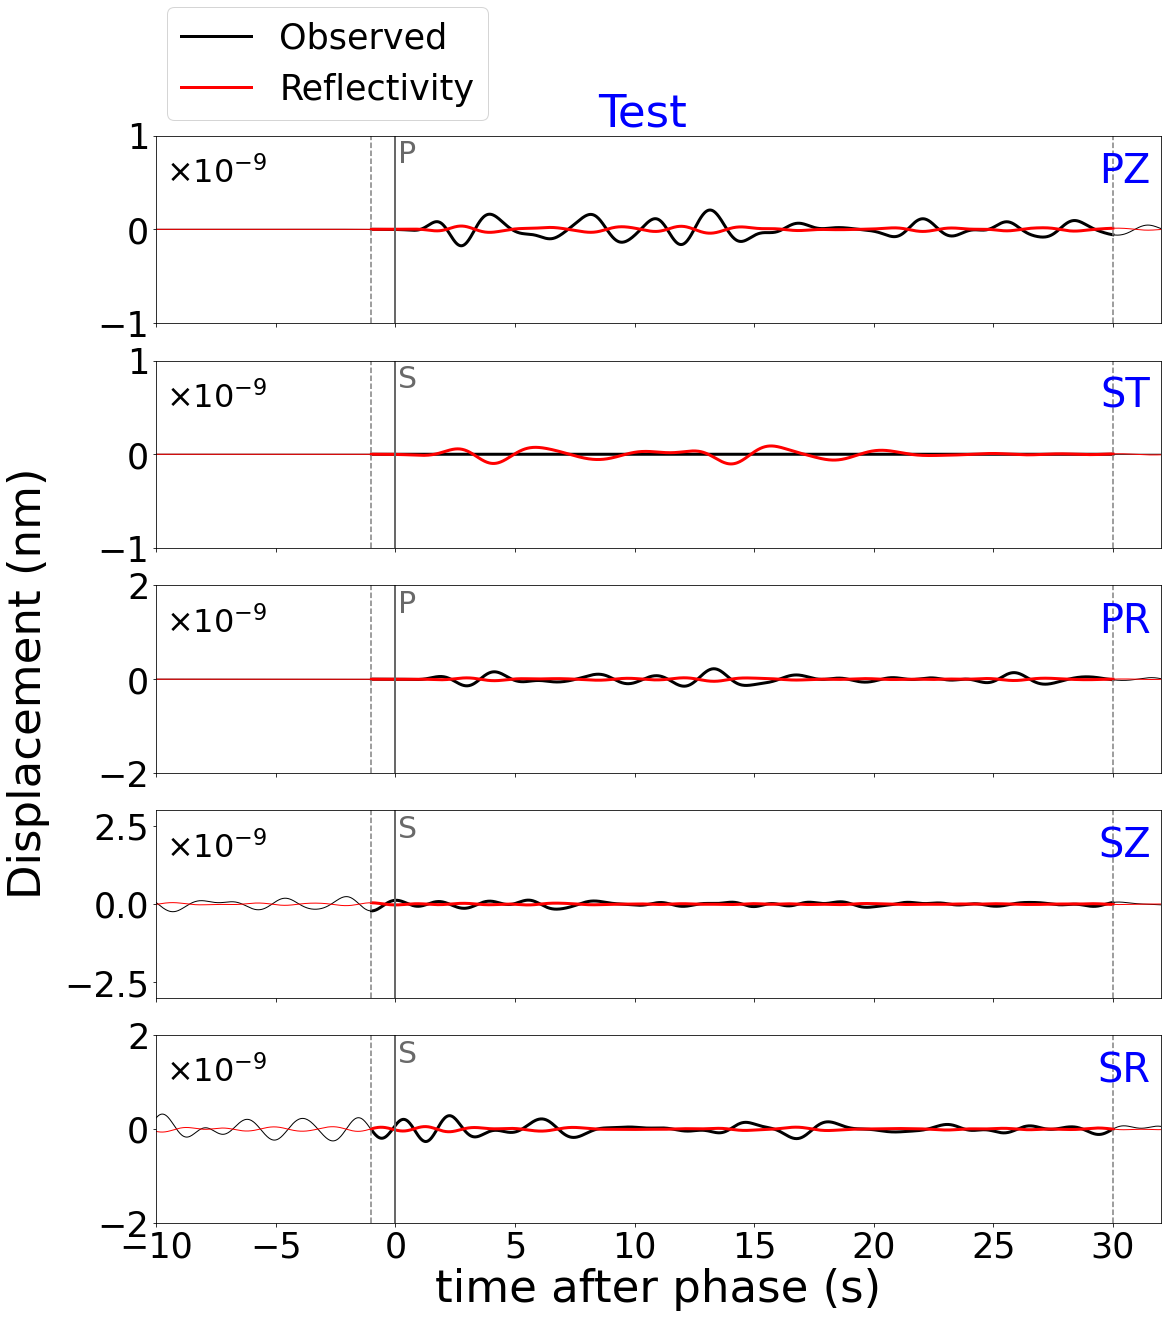

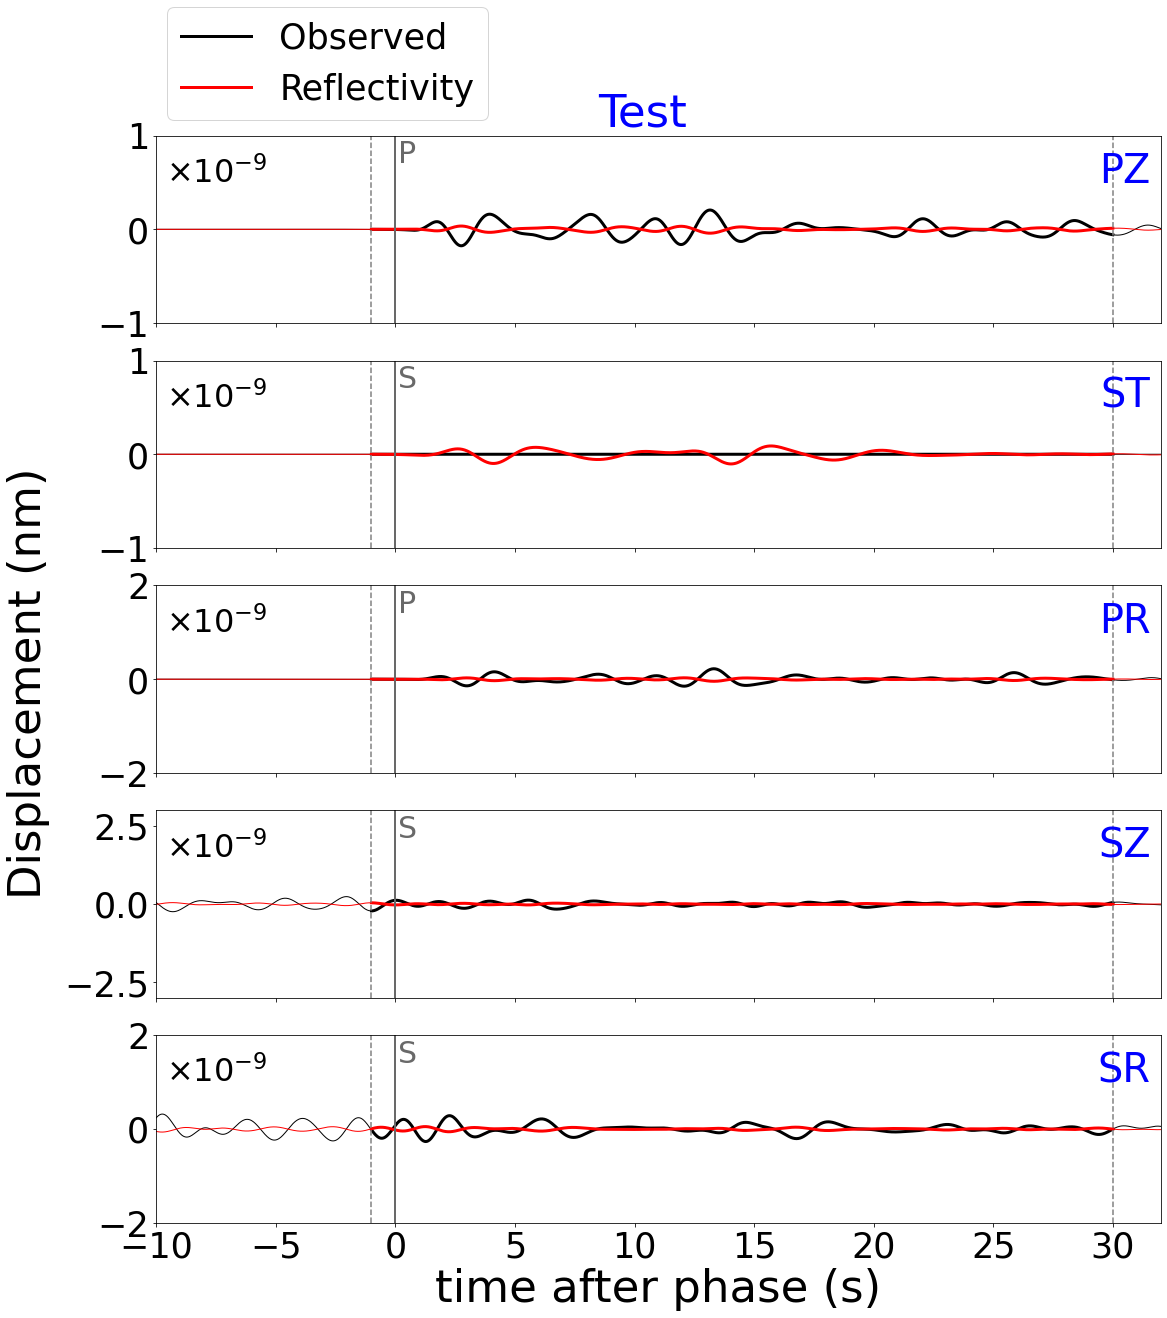

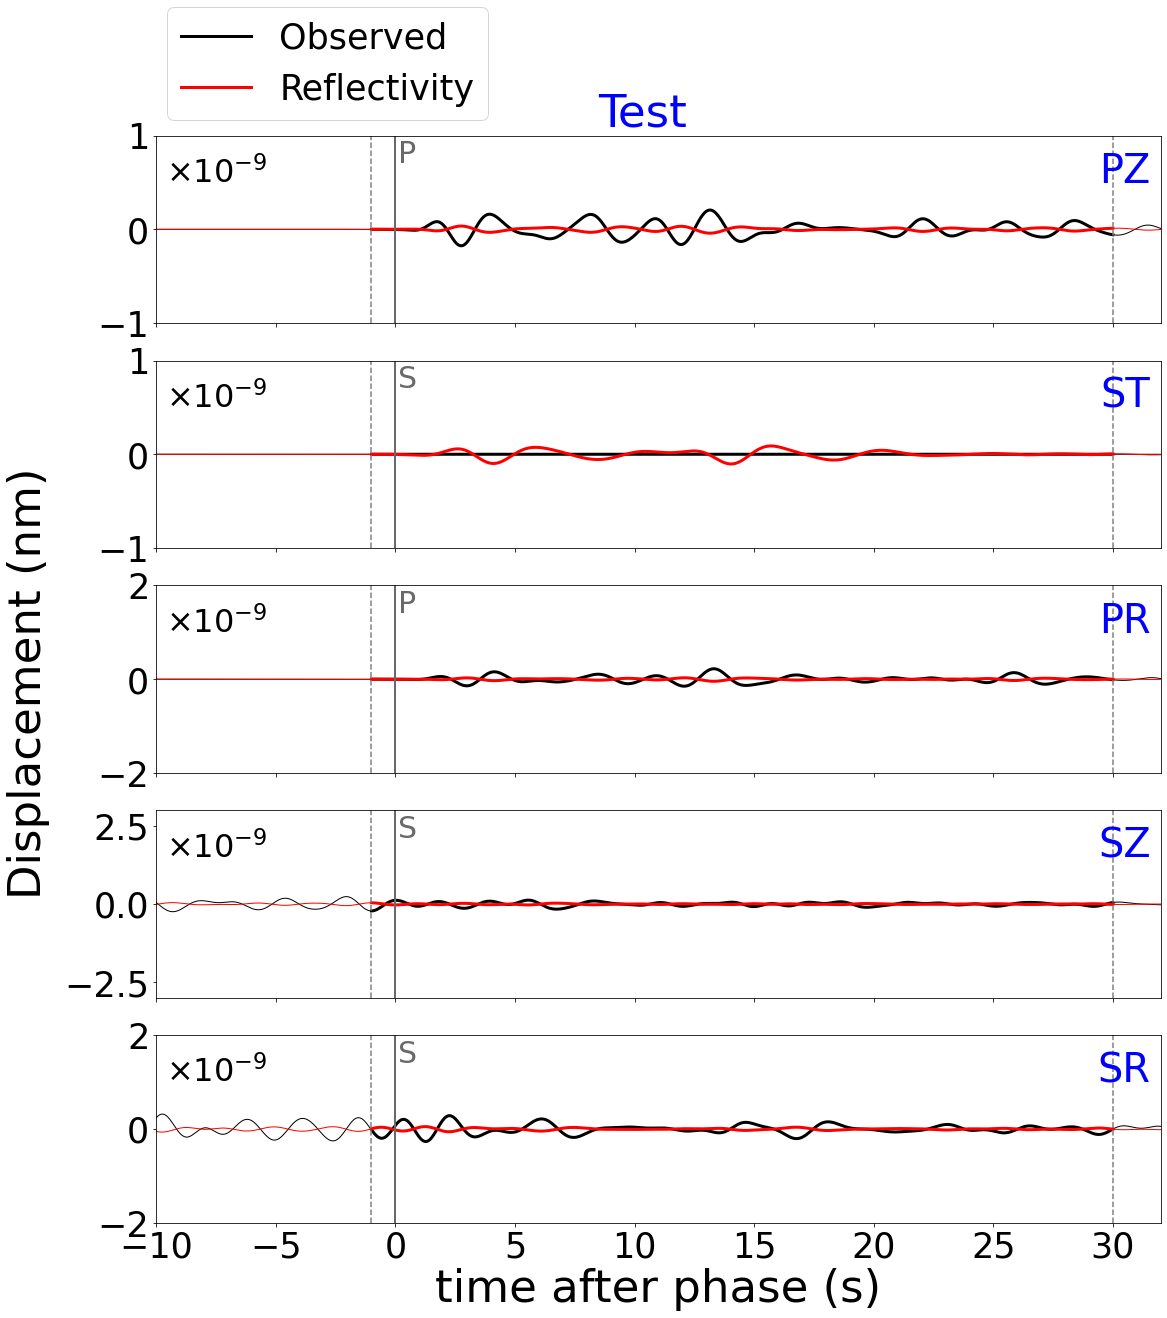

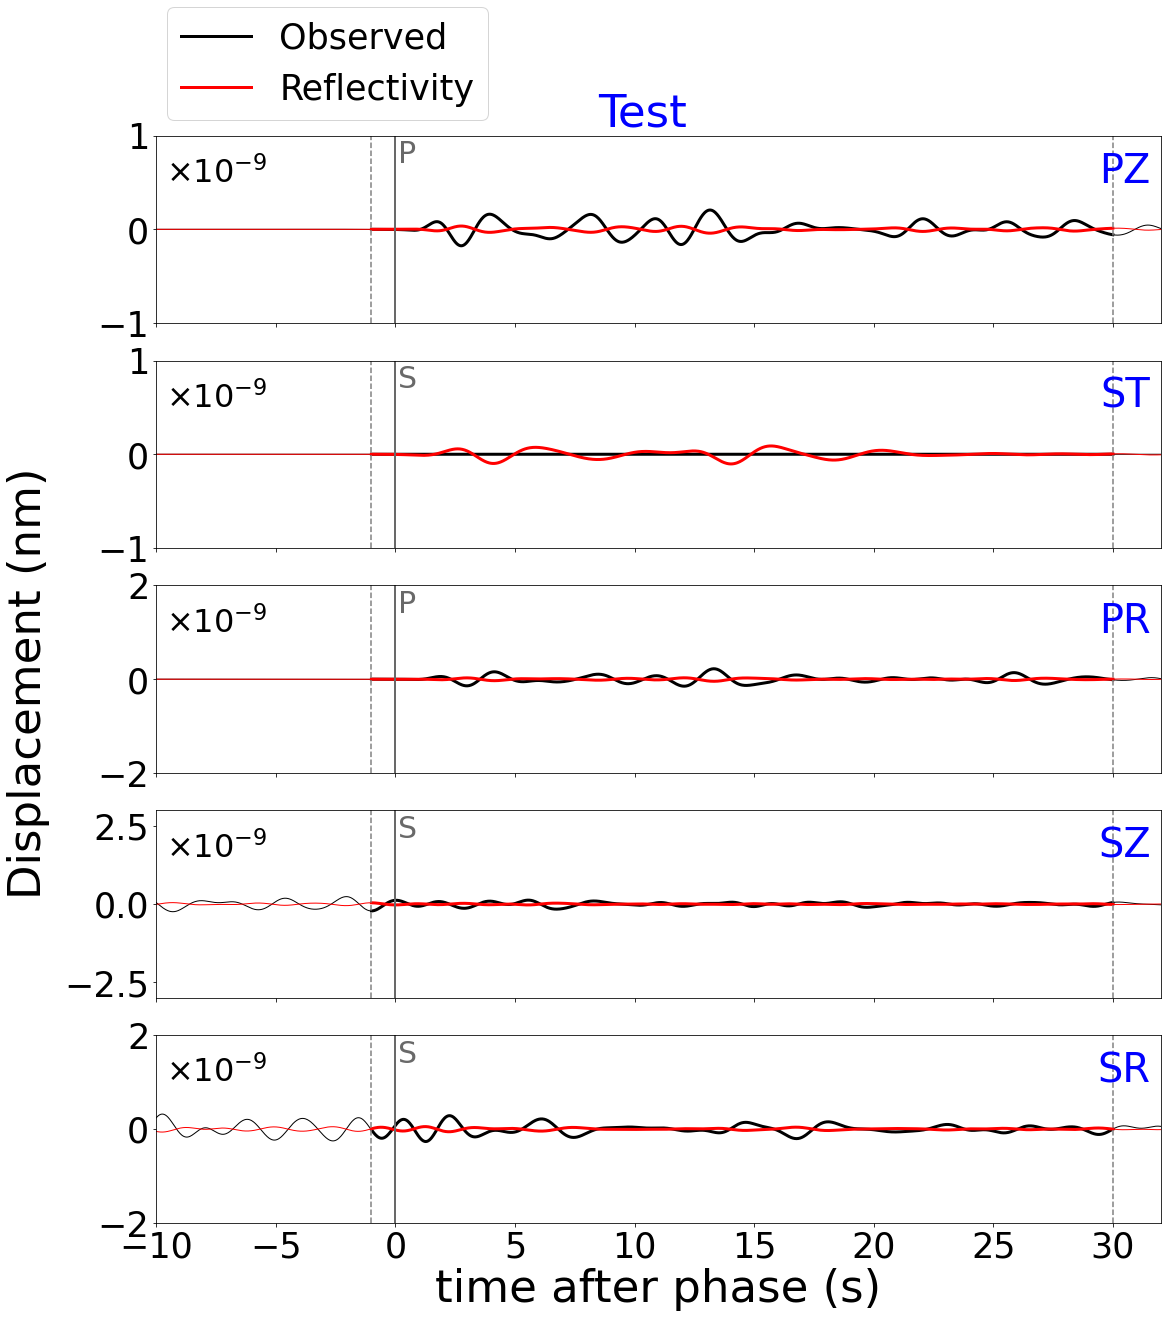

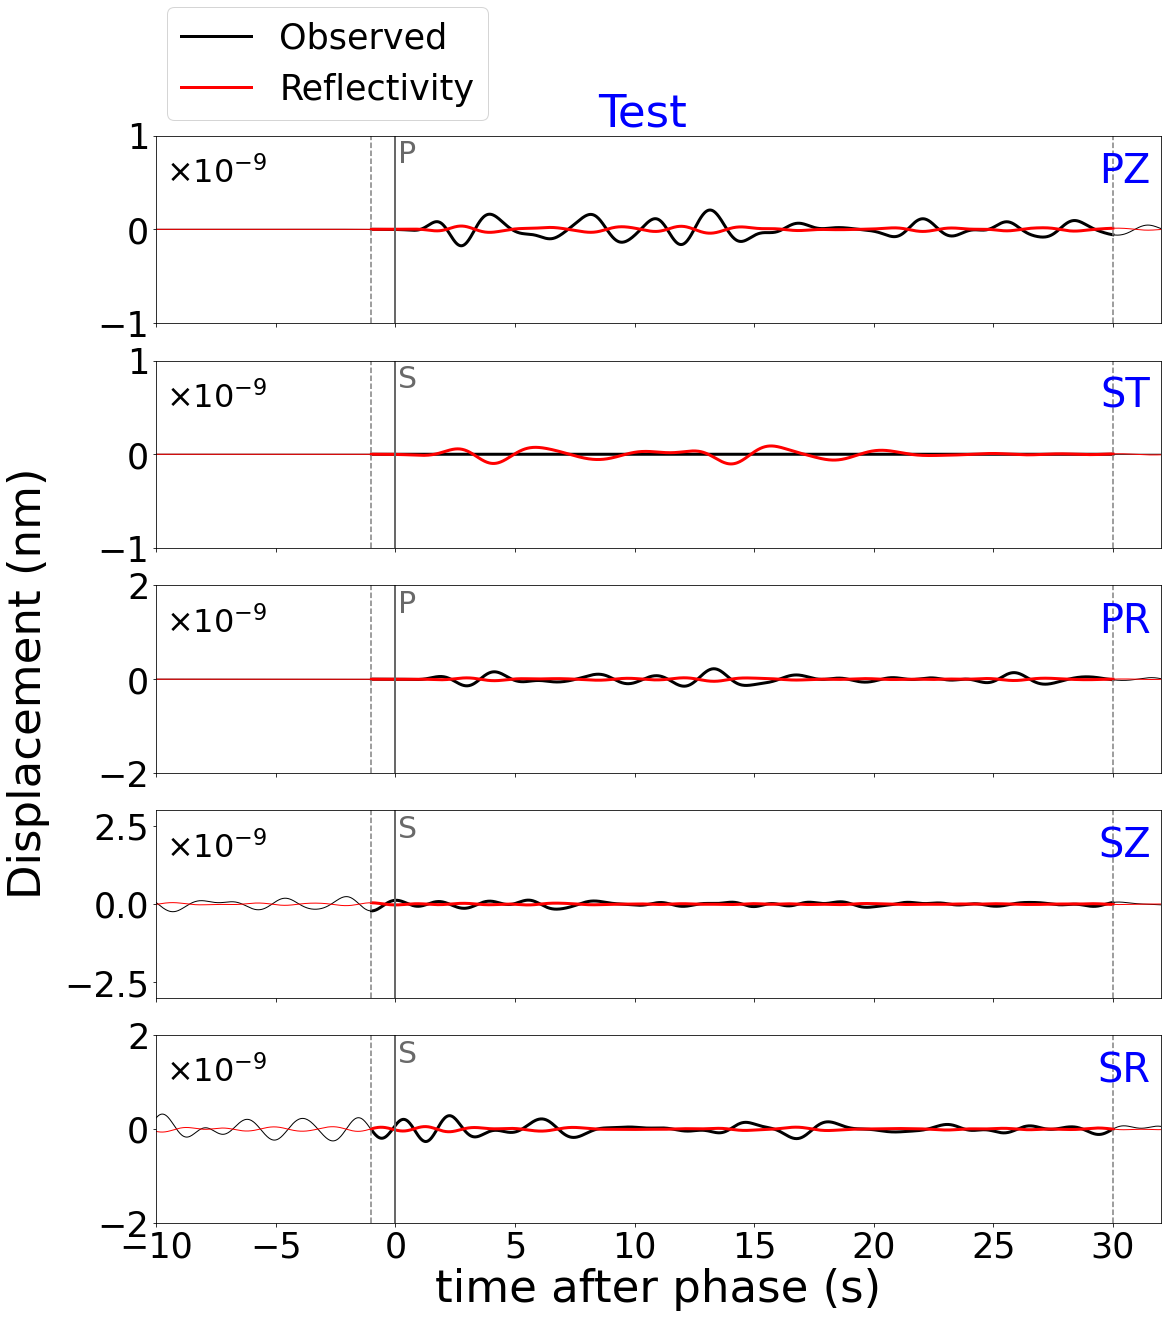

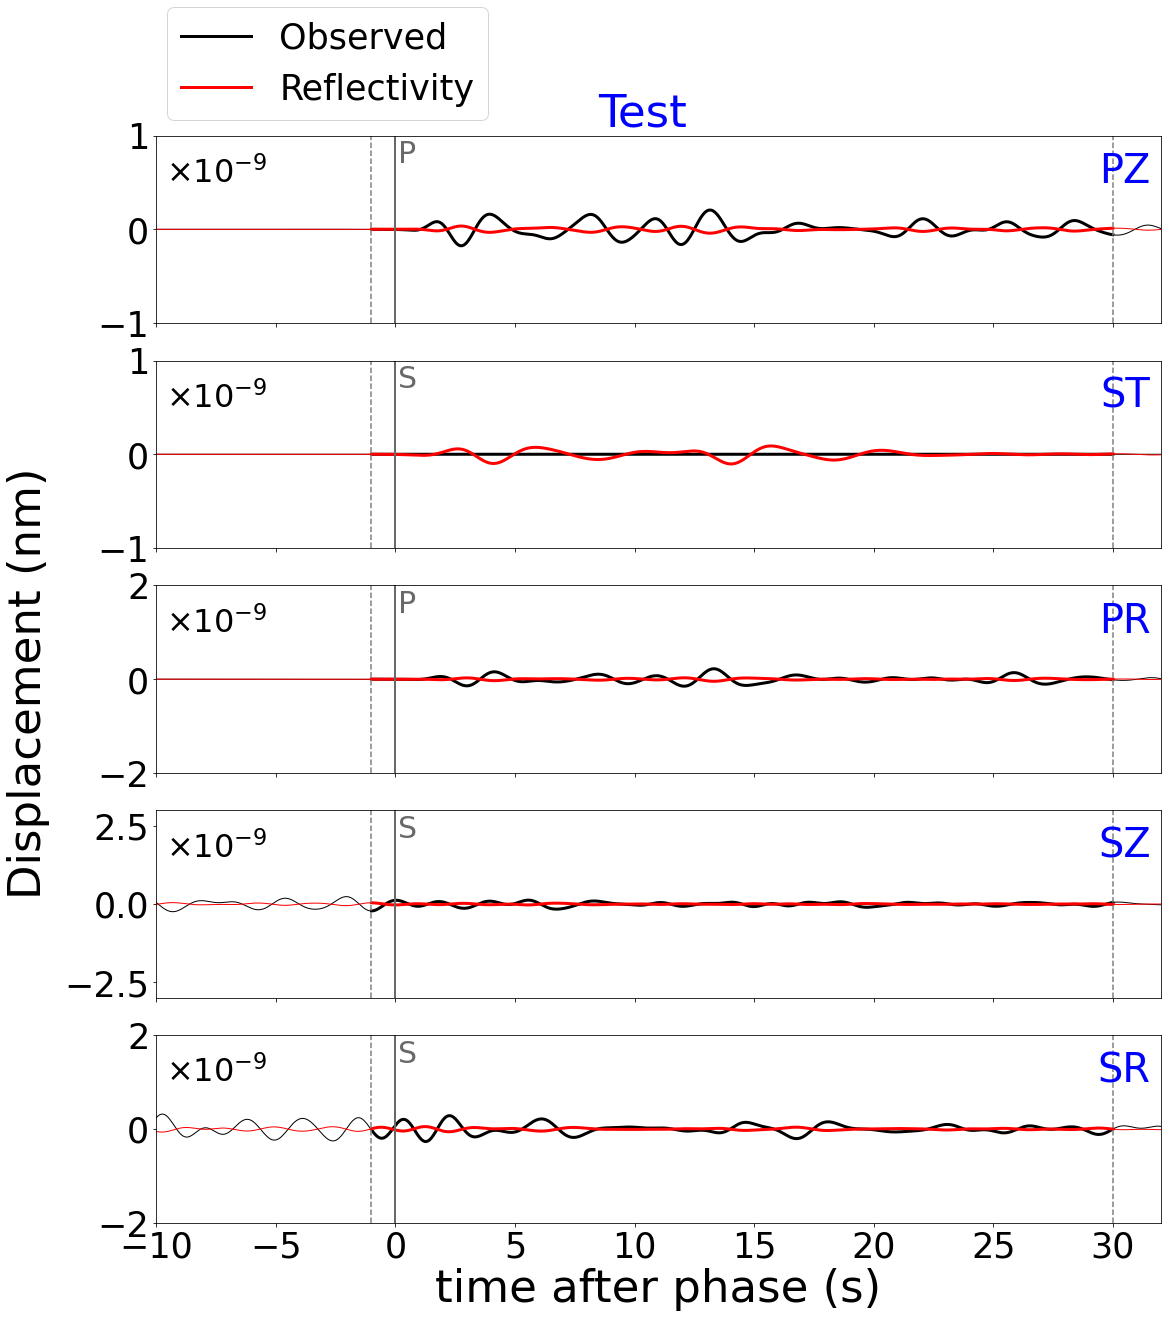

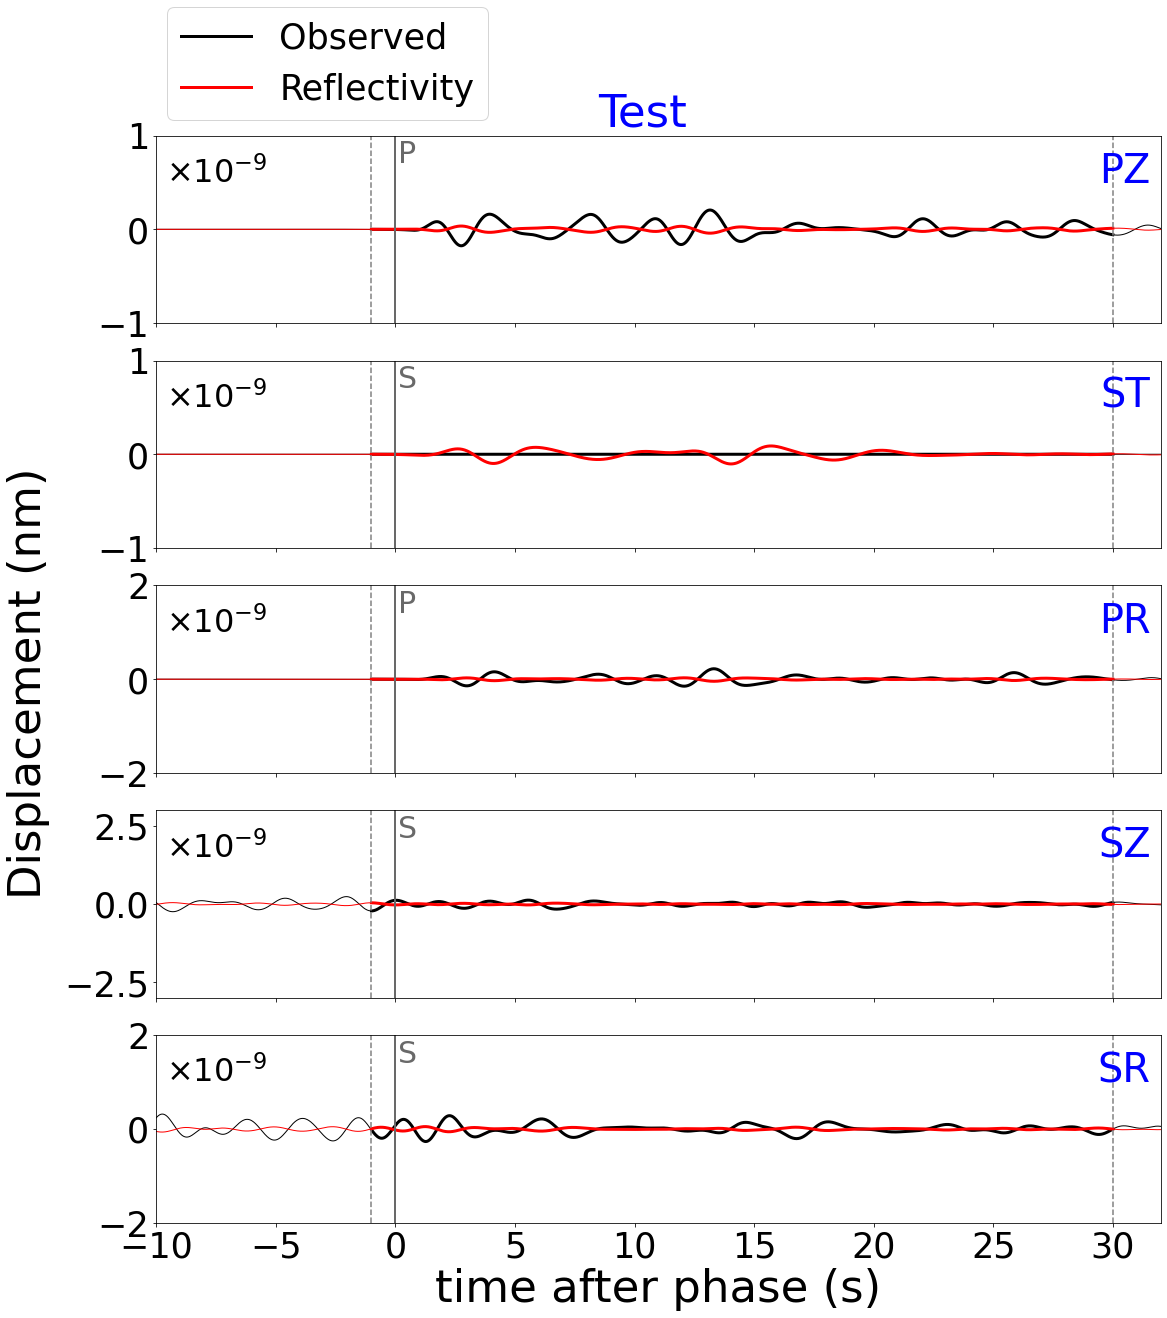

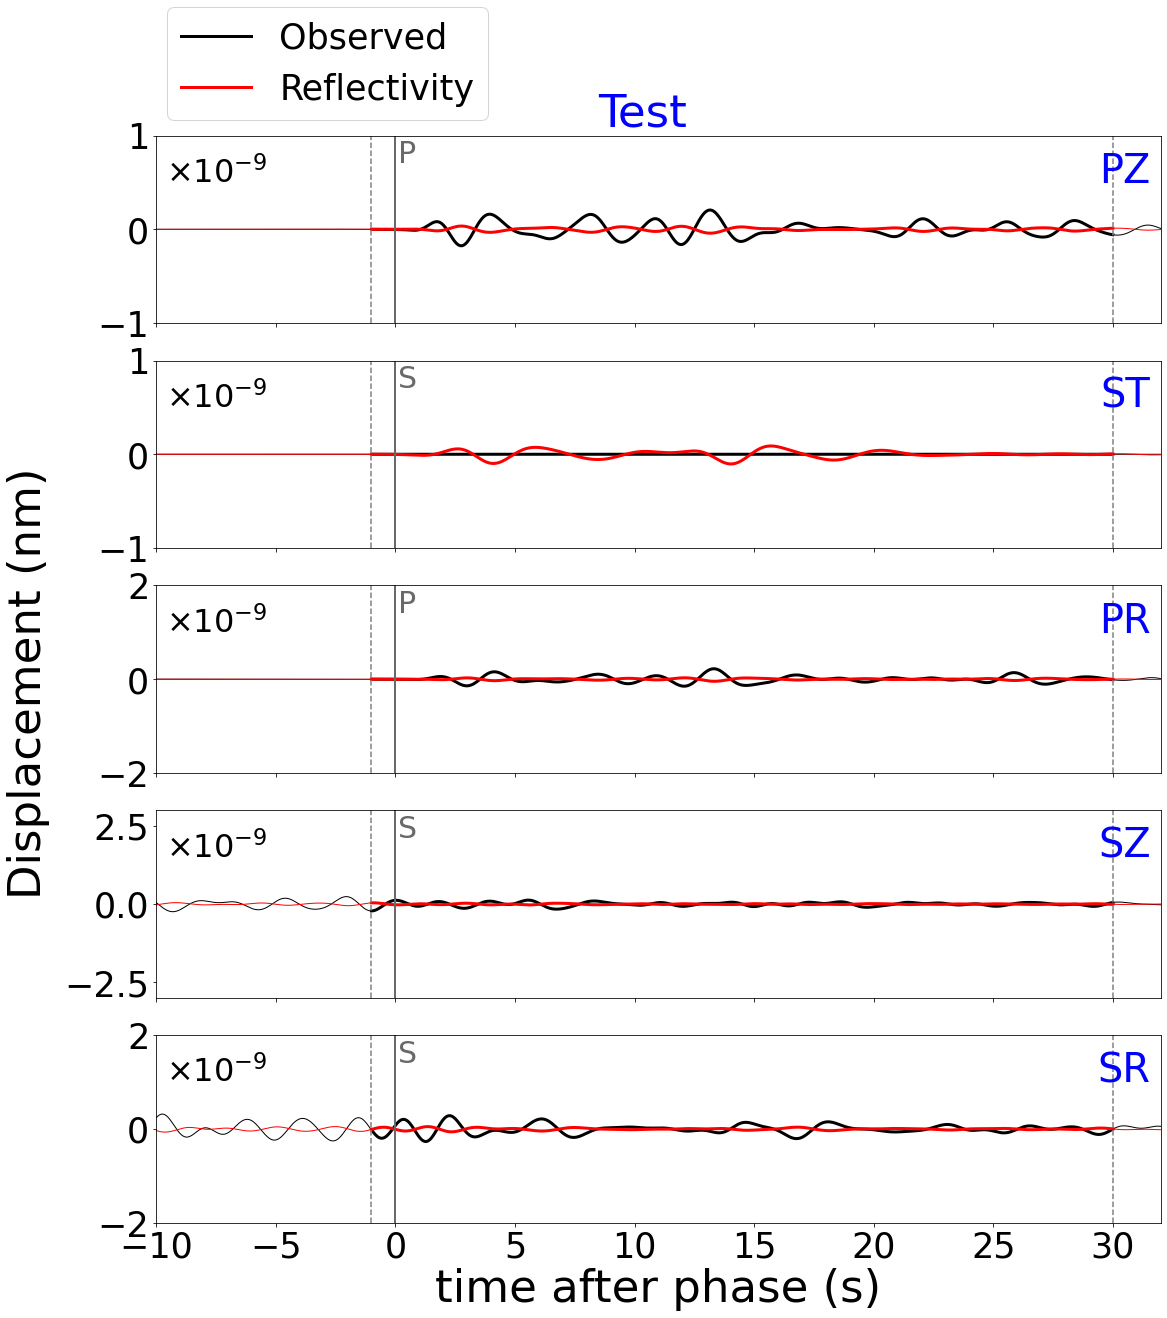

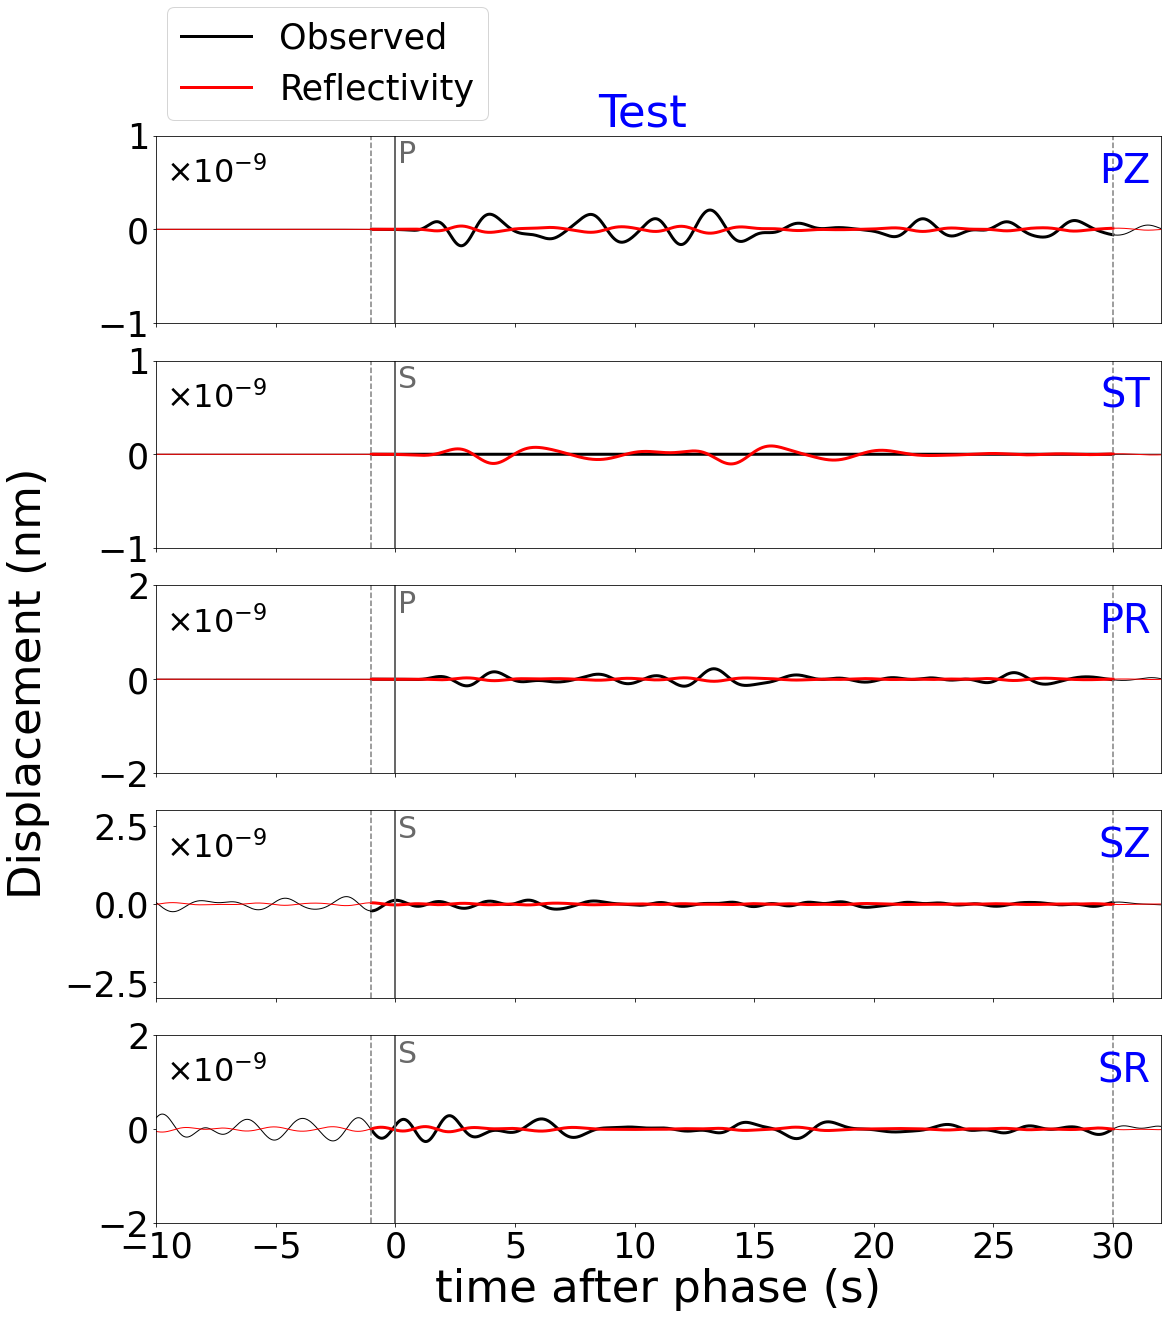

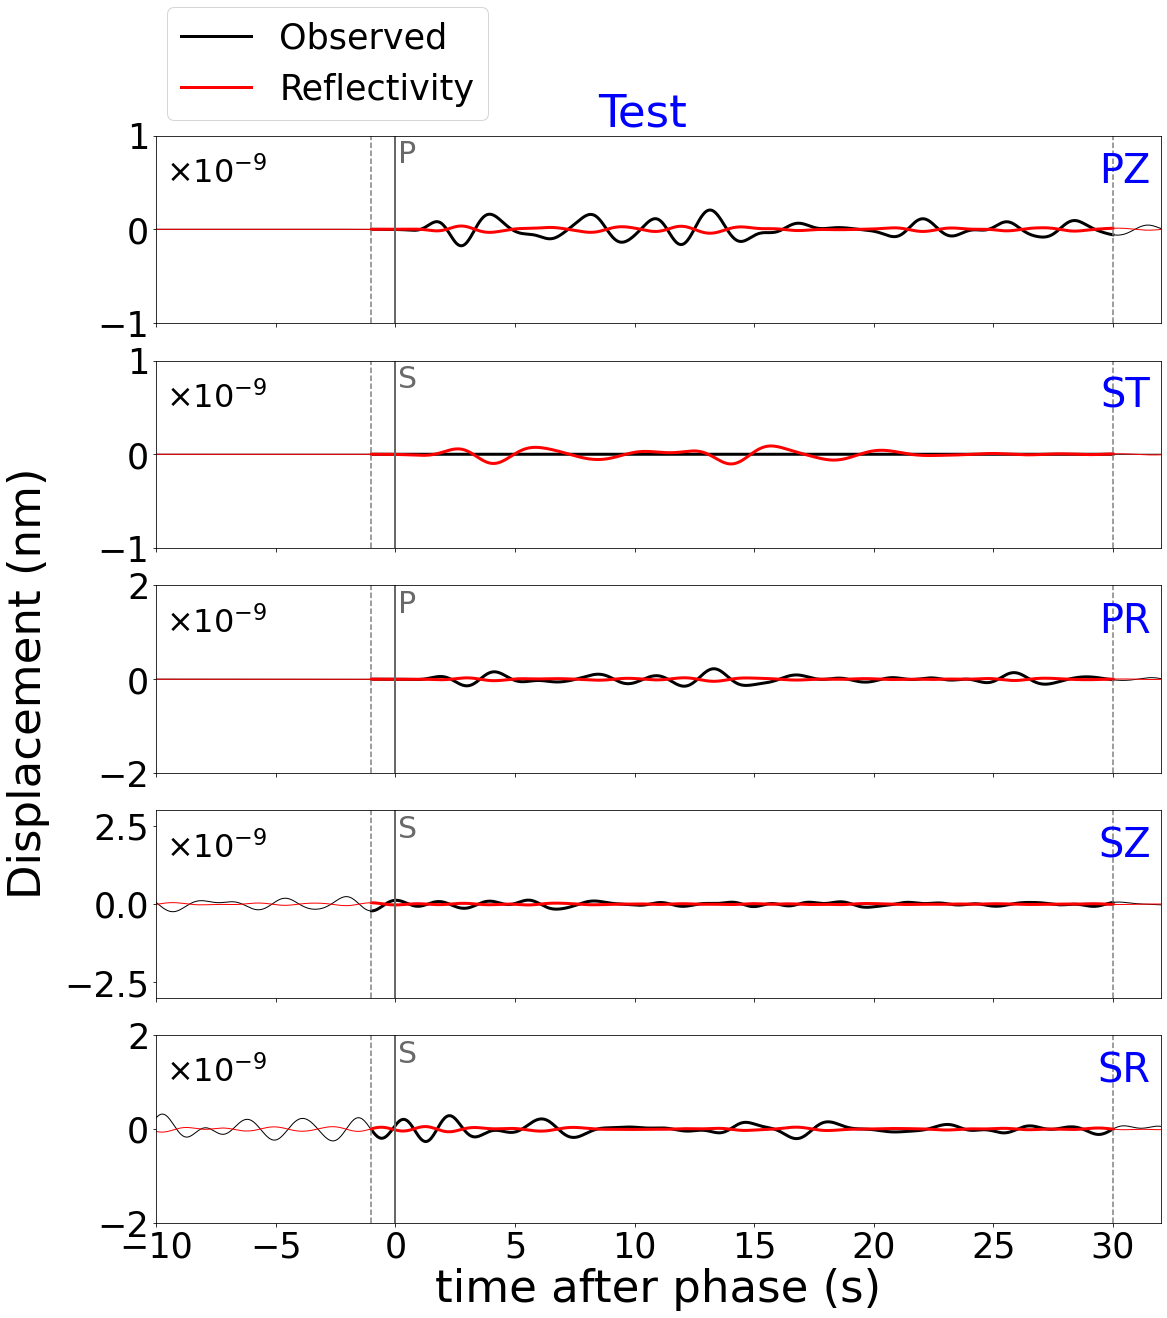

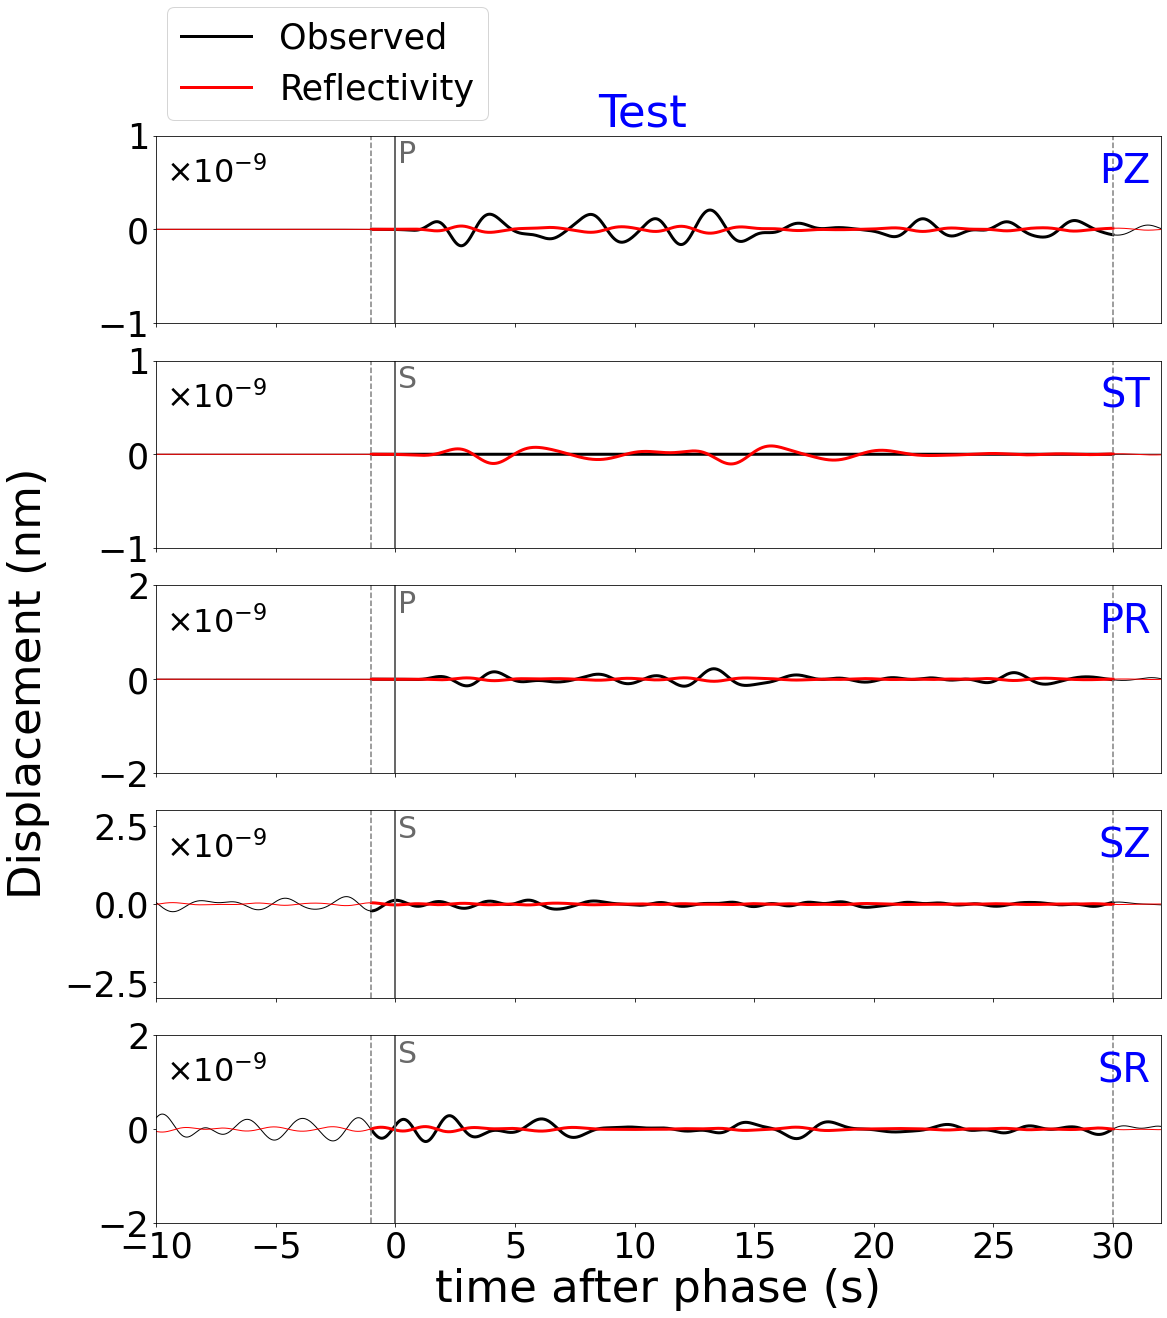

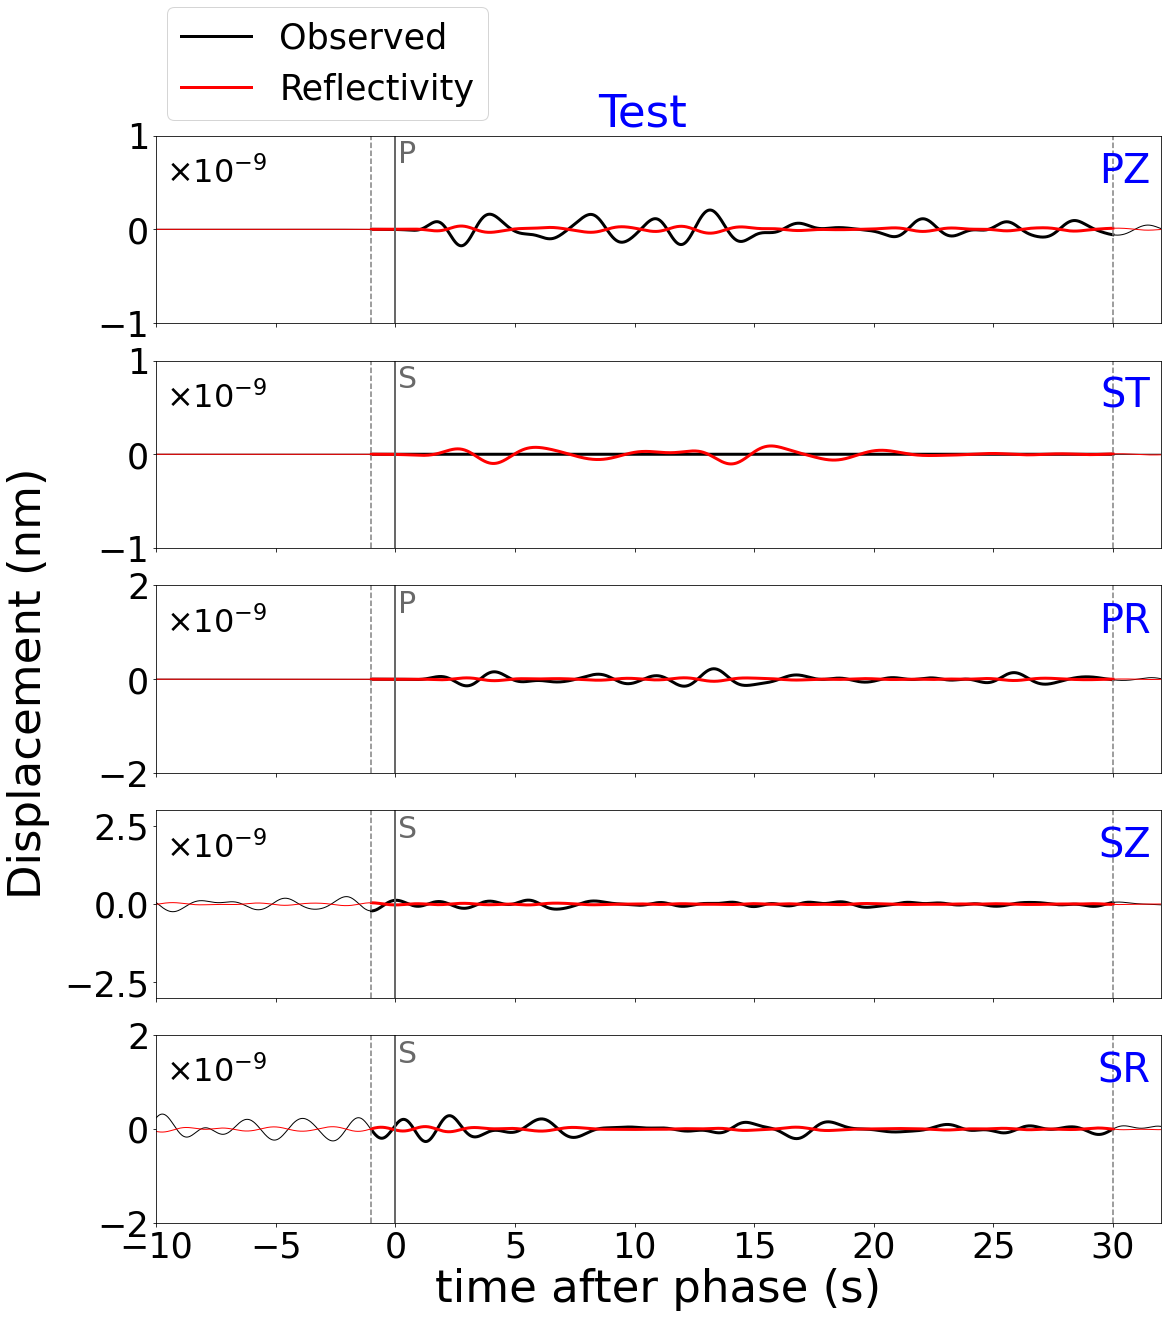

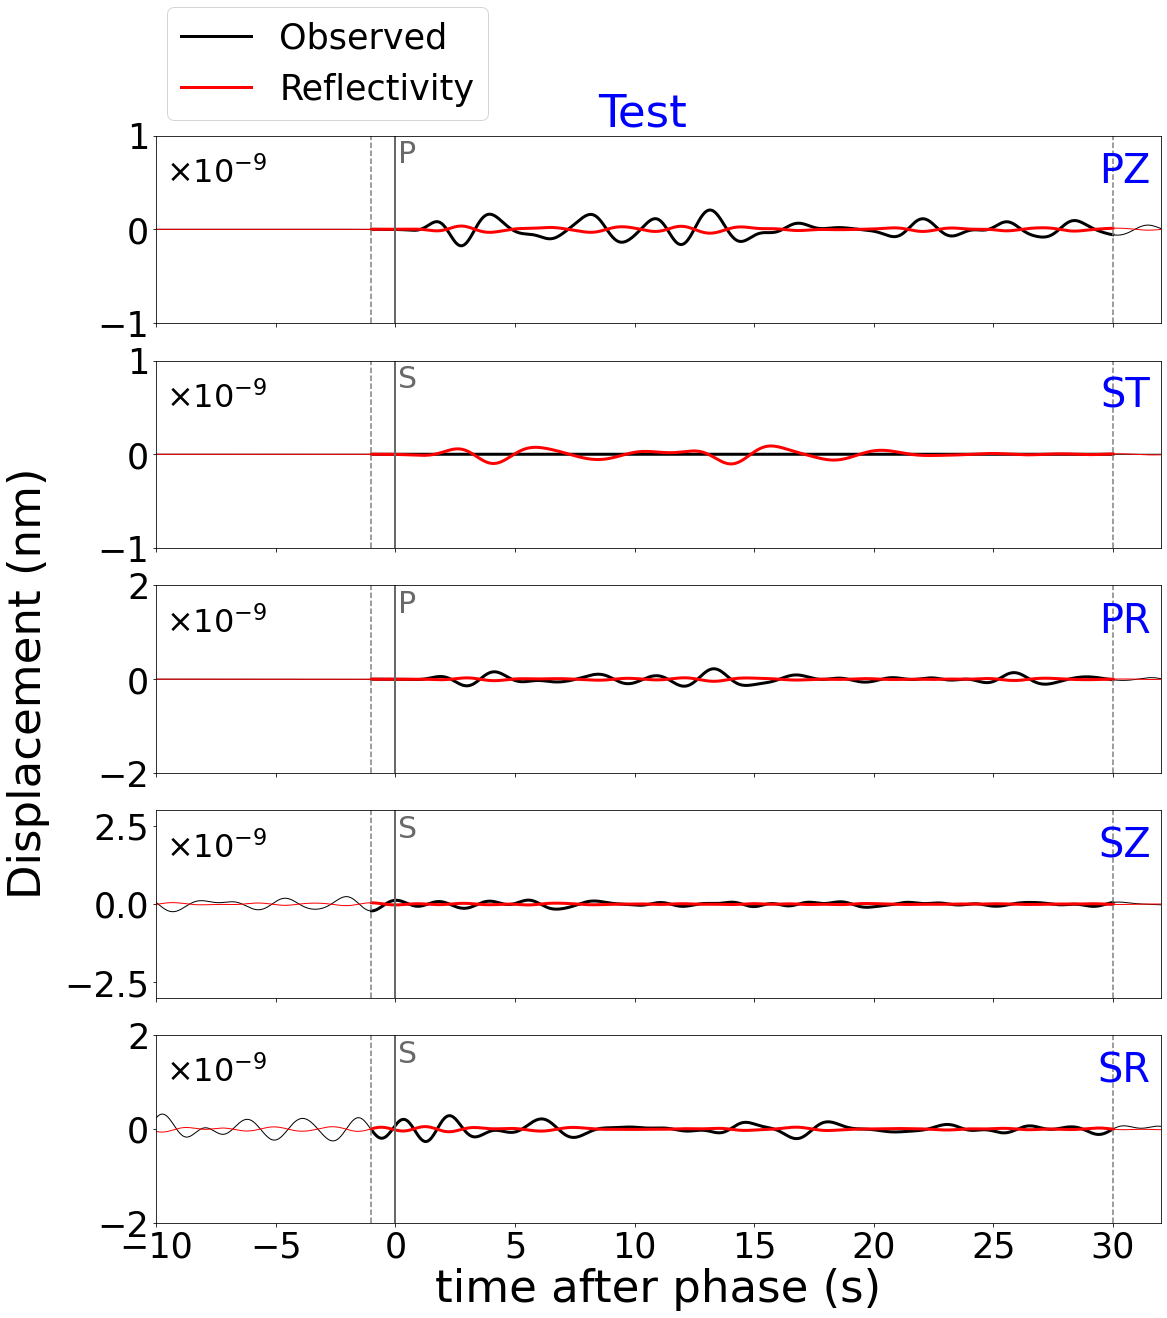

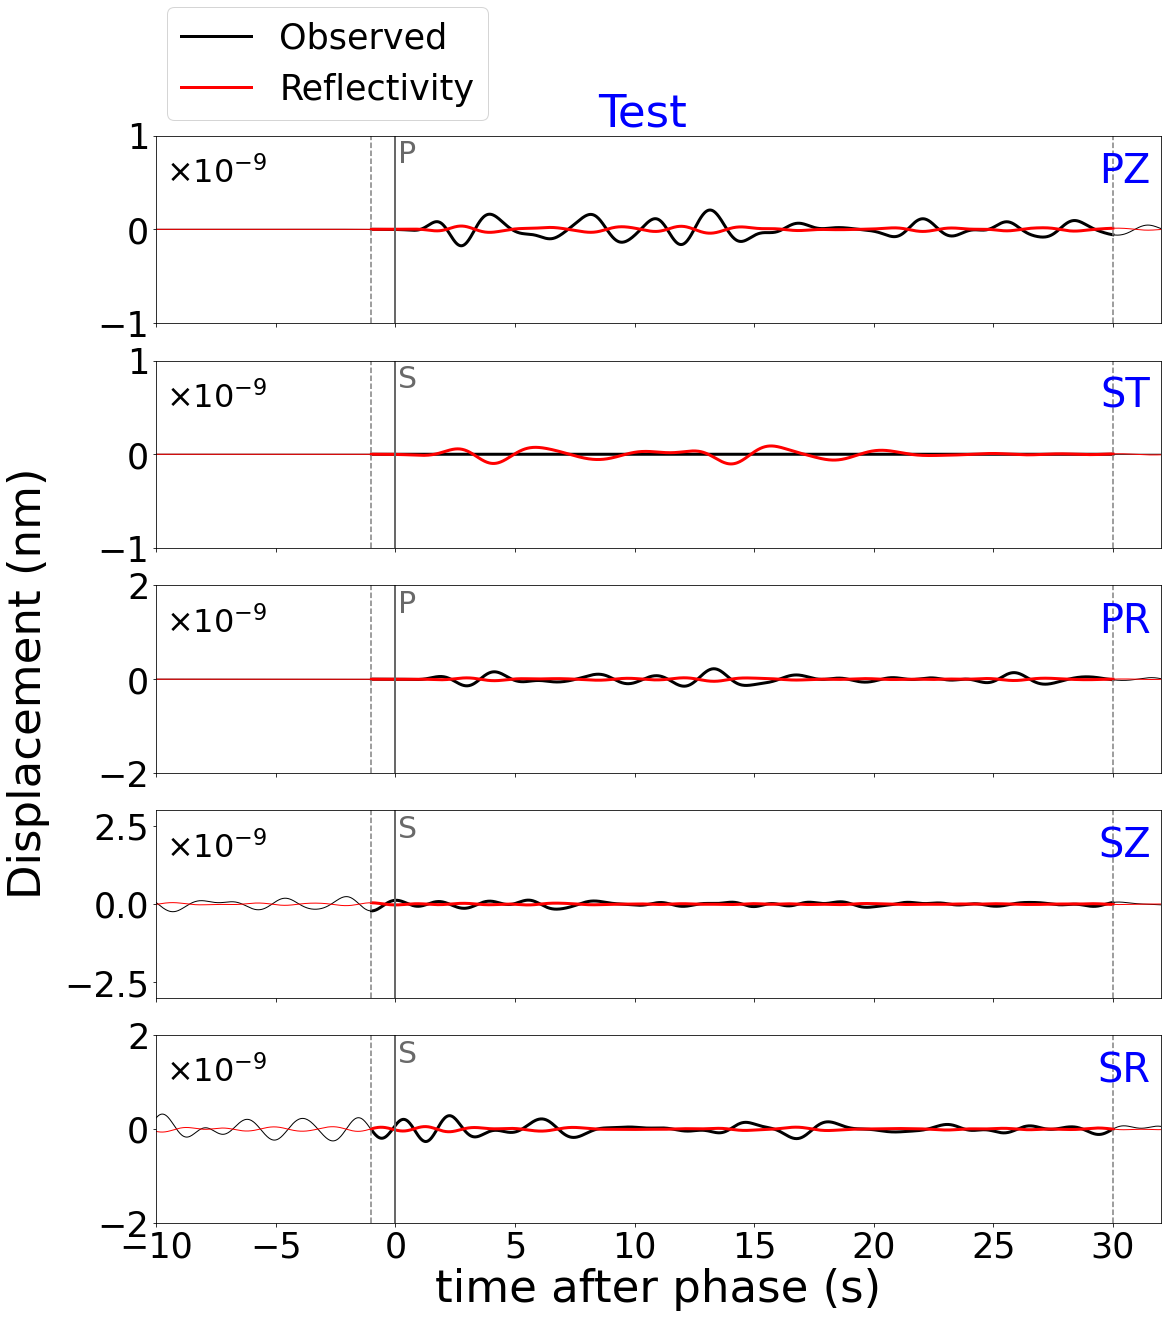

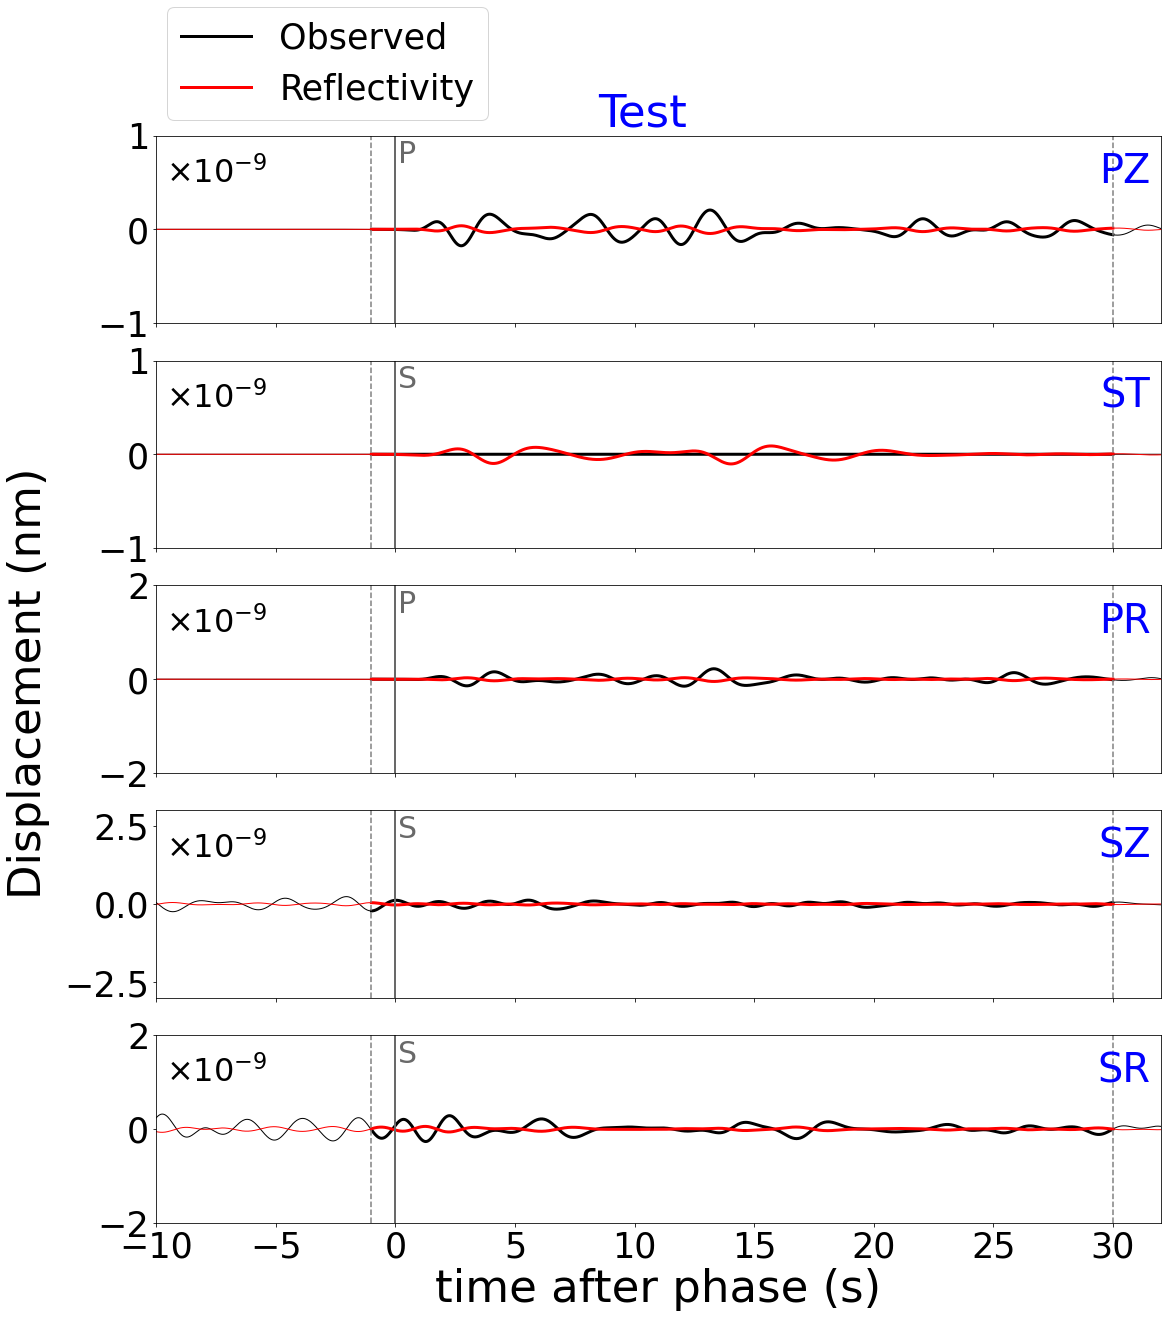

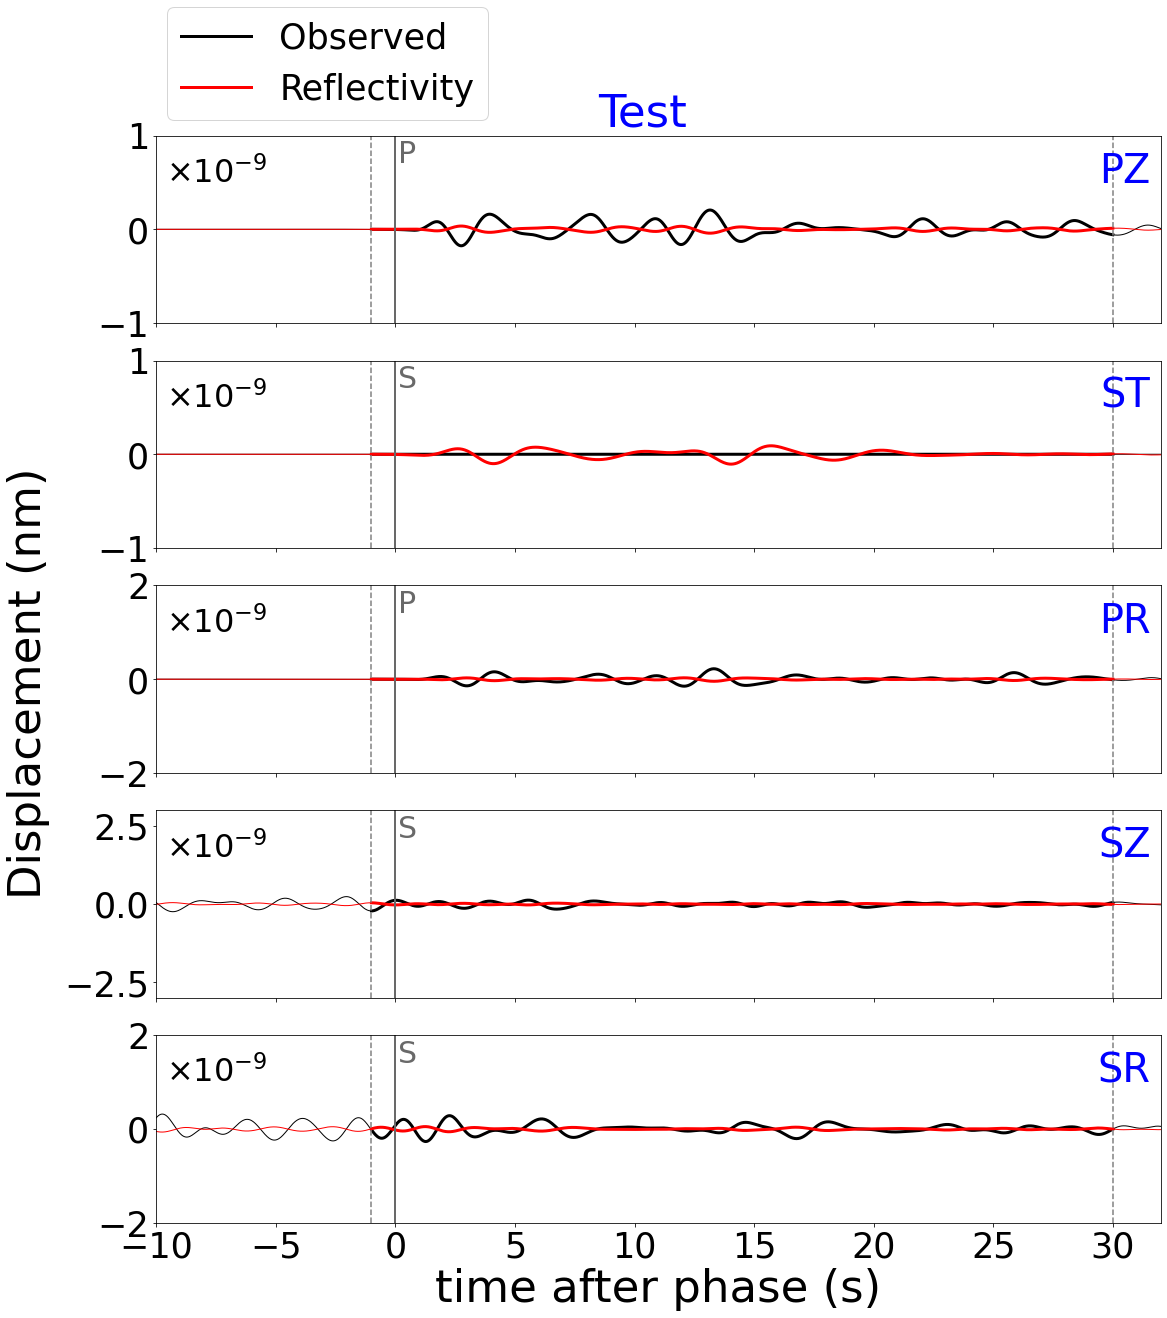

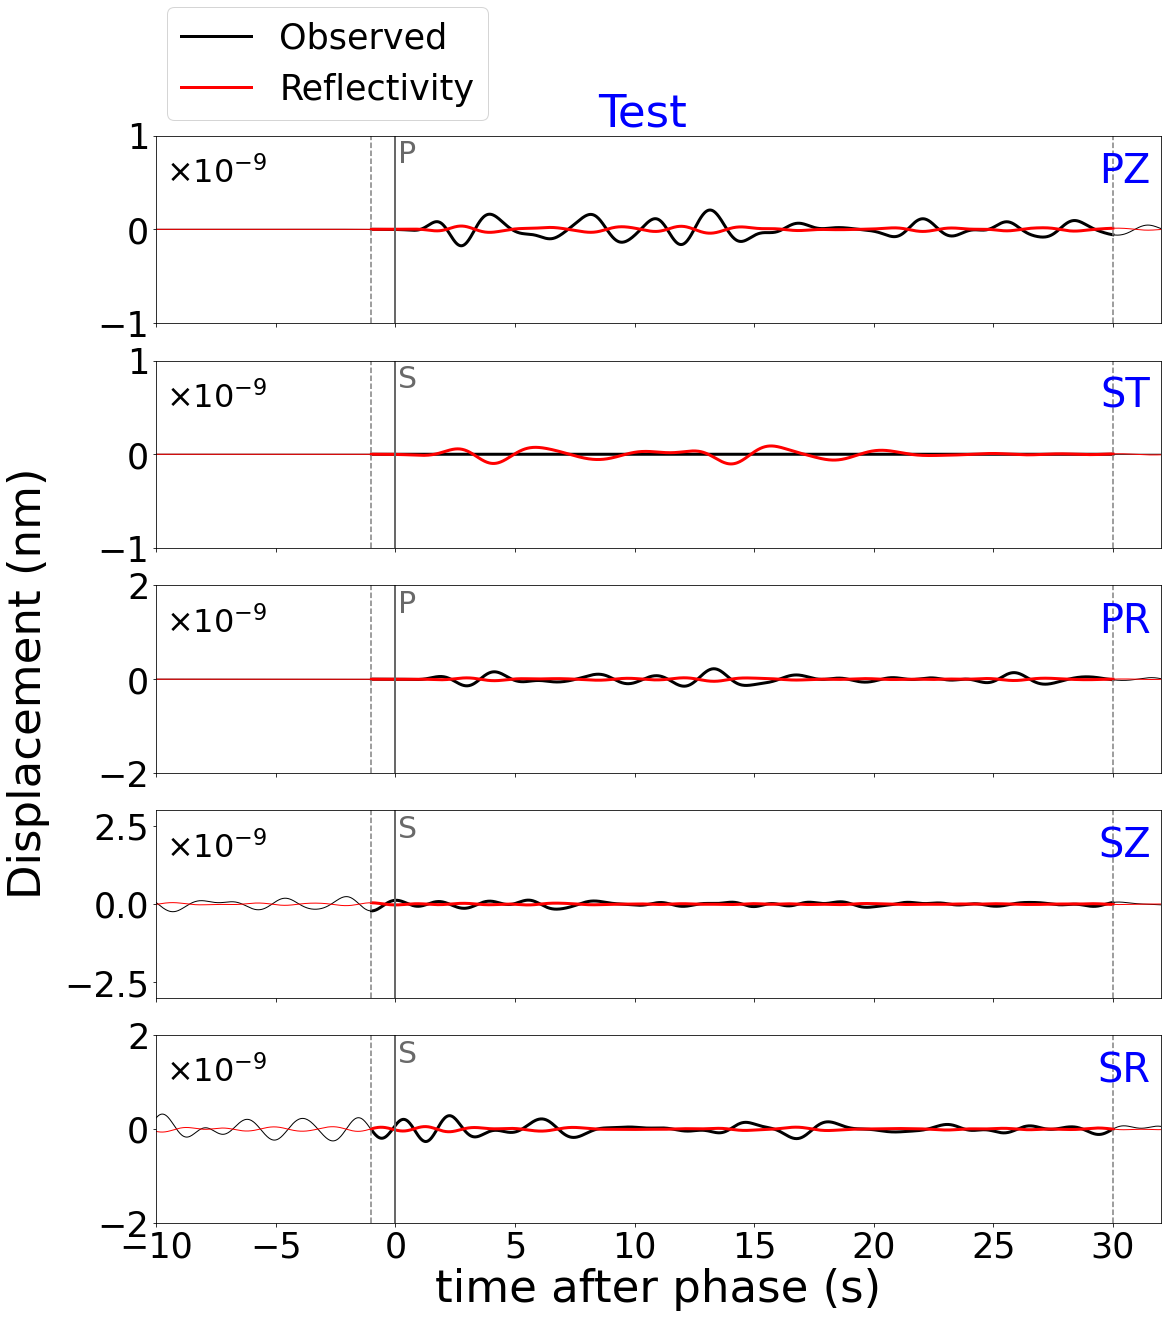

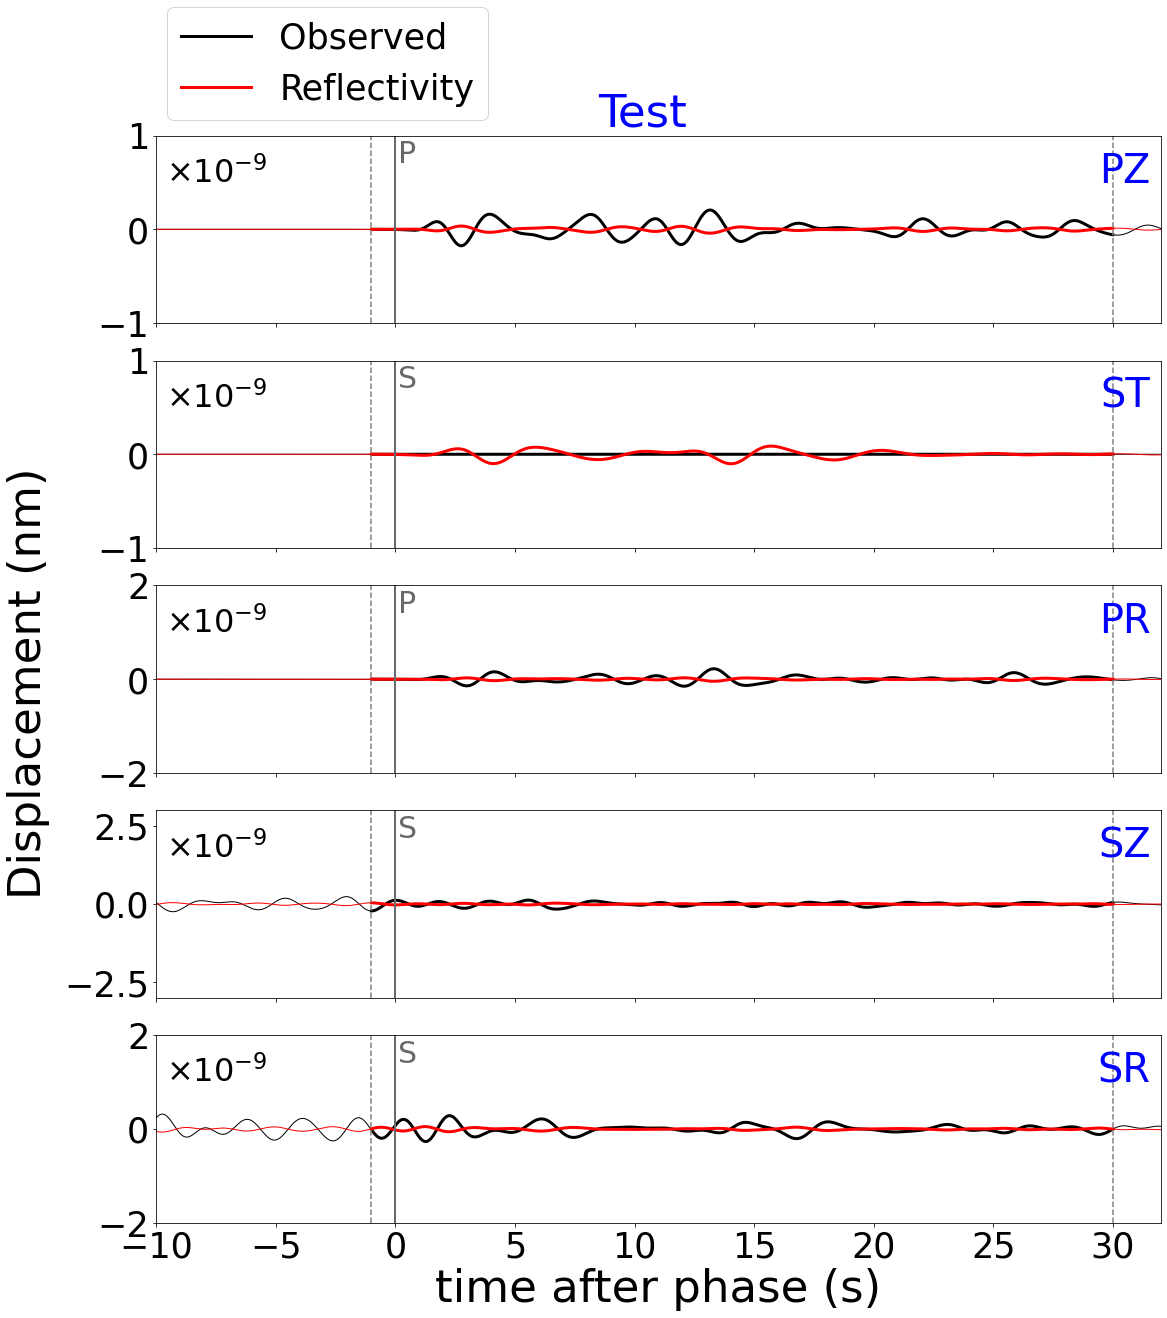

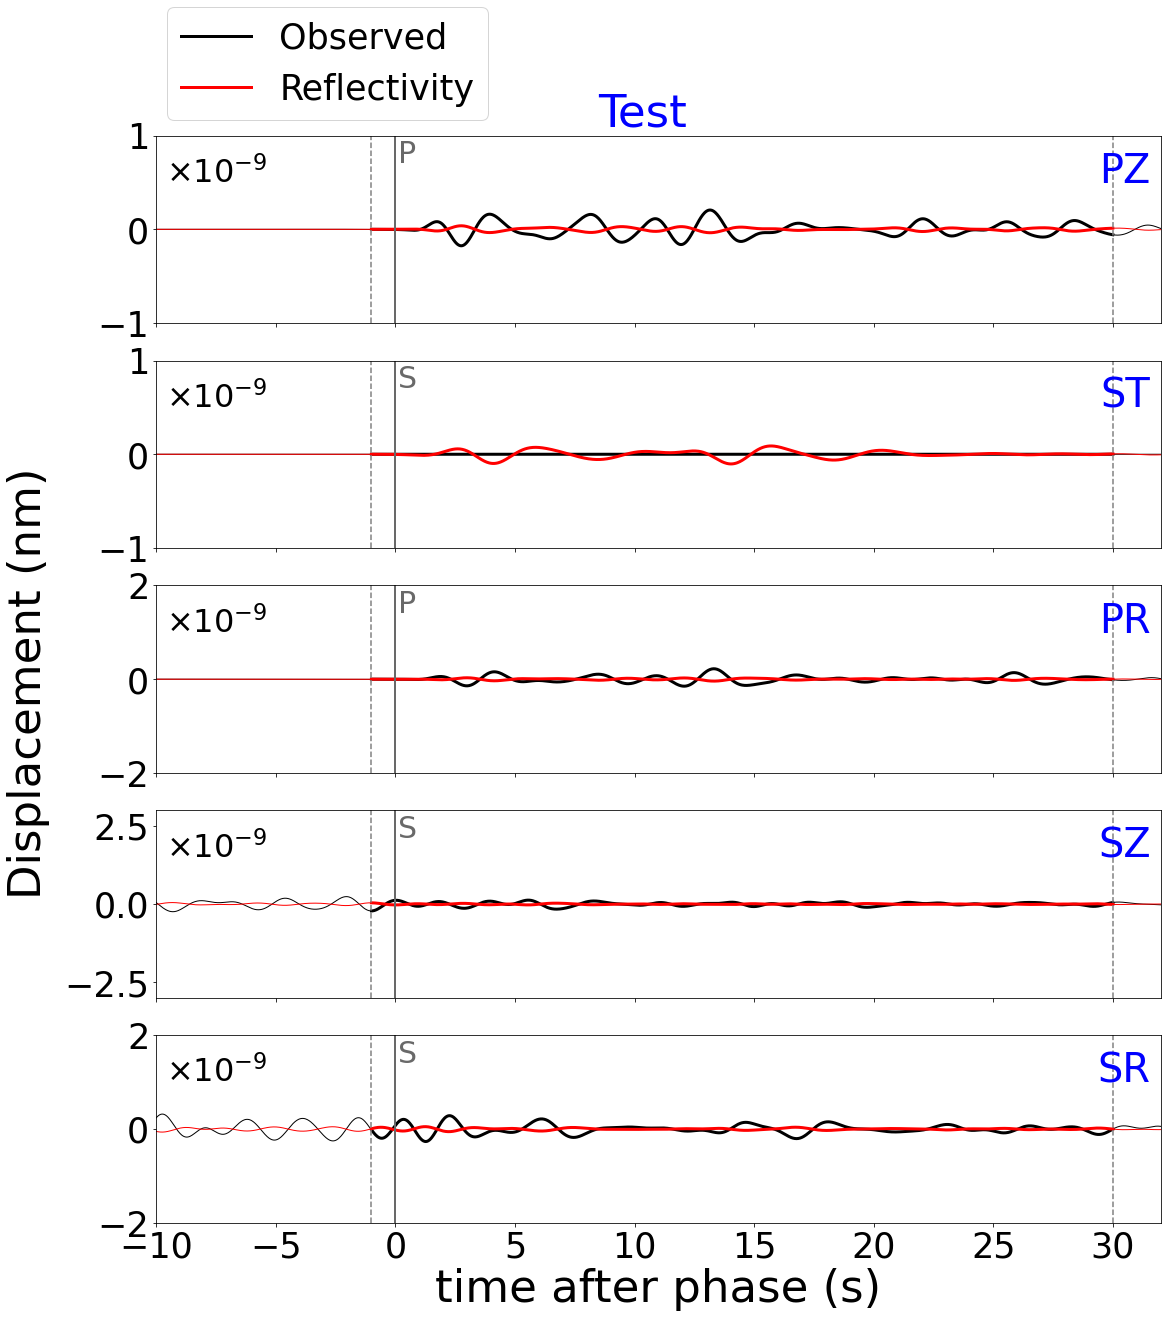

In [28]:
epsilons = [1e-10,1e-5,0.0001,0.001,0.01,0.1]
dxi_dms = np.zeros((len(m0), len(epsilons)))
# xis = np.zeros(len(epsilons))
for i,epsilon in enumerate(epsilons):
#     xis[i] = src_str.misfit(m0, st_obs_w)
    dxi_dm = af(
        m0,
        src_str.misfit,
        epsilon
        * np.array(
            [
                np.mean(m0[:-1]),
                np.mean(m0[:-1]),
                np.mean(m0[:-1]),
                np.mean(m0[:-1]),
                np.mean(m0[:-1]),
                np.mean(m0[:-1]),
                m0[-1],
            ]
        ),
        st_obs_w,
    )
    dxi_dms[:, i] = dxi_dm
    np.save(pjoin(save_path, "dxi_dms.npy"), dxi_dms)

In [11]:
m0

array([  0.2  ,   0.8  ,   0.   ,   0.   ,   0.   ,   0.   ,  77.368])

In [24]:
m0 - 0.00001 * dxi_dm

array([  2.24051946e-01,   7.97652316e-01,  -2.97475699e-03,
         0.00000000e+00,   8.92208270e-05,  -7.52752303e-03,
         7.73638730e+01])

In [25]:
dxi_dm

array([-2405.19456571,   234.76837864,   297.47569923,     0.        ,
          -8.9220827 ,   752.75230287,   412.6996366 ])